#### Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.linear_model import LinearRegression,SGDRegressor, PoissonRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

Loading the datasets

In [2]:
data_IND=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')

In [3]:
data_USA=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv')

In [4]:
data_AUS=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv')

Concating the datasets

In [5]:
data=pd.concat([data_IND,data_AUS,data_USA],axis=0)

Reseting the index

In [6]:
data=data.reset_index(drop=True)

Creating a dataframe

In [7]:
df=pd.DataFrame(data=data)

Checking the dataframe

In [8]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.00000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.00000,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.00000,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,NaN,2012.00000,Zotos International,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,3.67100,2.460150,2.489,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
13294,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,NaN,2018.00000,Zumbro Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
13295,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,NaN,NaN,Zumbro Garden LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,NaN,NaN,Public Service Co of Colorado,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,0.00000,0.000000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [9]:
df.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,2.41461,617.789264,843.74700,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,1.52800,1153.421000,1208.85200,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,5.03600,157.558250,152.19520,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,0.21500,674.391100,721.33520,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.43420,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.04600,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [10]:
df.tail(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
13278,USA,United States of America,Yuma Cogeneration Associates,USA0054694,62.6,32.7288,-114.6541,Gas,NaN,NaN,NaN,1994.000000,Falcon Power Operating Company,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,59.62,U.S. Energy Information Administration,NaN
13279,USA,United States of America,ZCO,USA0056276,1.6,35.0772,-118.3811,Wind,NaN,NaN,NaN,1986.000000,Wind Stream Operations LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,NaN,NaN,1.209000,1.704000,1.62900,1.877000,1.659,U.S. Energy Information Administration,NaN
13280,USA,United States of America,ZV Solar 1,USA0060980,5.0,34.8000,-79.2000,Solar,NaN,NaN,NaN,2016.000000,Cypress Creek Renewables,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,NaN,NaN,NaN,4.902000,4.14100,9.678000,9.791,U.S. Energy Information Administration,NaN
13281,USA,United States of America,ZV Solar 2 LLC,USA0061257,4.9,34.8160,-79.2000,Solar,NaN,NaN,NaN,2017.000000,CD Global Solar Holdings LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,NaN,NaN,NaN,NaN,4.16500,9.024000,9.575,U.S. Energy Information Administration,NaN
13282,USA,United States of America,ZV Solar 3 LLC,USA0060549,5.0,34.8162,-79.2002,Solar,NaN,NaN,NaN,2016.000000,SRE Utility Solar 1 LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,NaN,NaN,NaN,8.204000,10.37900,9.396000,9.364,U.S. Energy Information Administration,NaN
13283,USA,United States of America,Zeeland,USA0001867,22.3,42.8067,-86.0558,Gas,Oil,NaN,NaN,1972.049327,City of Zeeland - (MI),U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,1.00548,-0.34400,-0.194000,0.050000,0.36300,0.257000,0.269,U.S. Energy Information Administration,NaN
13284,USA,United States of America,Zeeland Farm Services,USA0058704,3.2,42.8131,-85.9861,Biomass,NaN,NaN,NaN,2007.500000,Zeeland Farm Services,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,12.54596,9.81078,10.407600,11.642400,8.25062,12.708640,13.24862,U.S. Energy Information Administration,NaN
13285,USA,United States of America,Zeeland Generating Station,USA0055087,968.2,42.8206,-85.9975,Gas,NaN,NaN,NaN,2001.610205,Consumers Energy Co,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,1380.35000,1999.51000,3471.259000,4000.792000,3212.41900,3156.472000,4075.661,U.S. Energy Information Administration,NaN
13286,USA,United States of America,Zephyr Wind,USA0060128,4.5,41.0961,-83.6414,Wind,NaN,NaN,NaN,2016.000000,OEE XIX LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,NaN,NaN,0.000000,10.791000,11.47000,10.858000,11.108,U.S. Energy Information Administration,NaN
13287,USA,United States of America,Zephyr Wind Project - 2.0,USA0062653,0.0,41.0931,-83.6378,NaN,NaN,NaN,NaN,NaN,OEE XXX LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,U.S. Energy I

Checking the shape of the dataframe

In [11]:
df.shape

(13298, 27)

Checking the columns types

In [12]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Checking the information about the dataframe

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

- The dataset has 13298 rows and 27 columns.
- We need to predict the Primary Fuel and capacity_mw from the dataset. 
- There are 2 types of data types present in the dataset i.e. object and float.
- We observe capacity_mw column has rows with 0 values and generation_gwh columns has rows with negative data. Hence we need to perform further analysis.
- The columns commissioning_year and year_of_capacity_data represents date. Hence we need to convert it to date format.
- The column generation_gwh_2019 is in object data type. However, we can observe that the column data is of float type. Hence, we need to convert it to float.
- Null values are present in the dataset.
- We observe that country and country_long contains the same data. Hence, we can remove one column.
- We can drop column gppd_idnr from the dataset as it is an identifier for the power plant. Also we can drop the column url as it does not play any sinificant role in the dataset.
- The latitude and longitude is the location of the power plant and has no role in predicting the primary_fuel and capacity_mw. Hence we can drop the 2 columns.
- We can drop column generation_data_source from the dataset as it plays no significant role in the dataset.
- We can also drop the column source from the dataset as the column source has no relation with Primary Fuel or capacity_mw.
- We can observe from the dataset that Primary Fuel column is an object column and hence comes under classification and capacity_mw is a float and which comes under linear regression.
- We need to predict Primary Fuel by creating classification models and to predict capacity_mw by creating regression models from the dataset.

Checking for negative values in generation_gwh columns

Removing the negative value rows from the dataset

Dropping country_long column

In [14]:
df.drop('country_long',axis=1,inplace=True)

Dropping column gppd_idnr

In [15]:
df.drop('gppd_idnr',axis=1,inplace=True)

Dropping column URL

In [16]:
df.drop('url',axis=1,inplace=True)

Dropping columns latitude and longitude

In [17]:
df.drop('latitude',axis=1,inplace=True)
df.drop('longitude',axis=1,inplace=True)

Checking for null values

In [18]:
df.isnull().sum()

country                         0
name                            0
capacity_mw                     6
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

Checking Null value percentage in each column

In [19]:
null_percentage = df.isnull().mean() * 100
null_percentage

country                       0.000000
name                          0.000000
capacity_mw                   0.045120
primary_fuel                 15.069935
other_fuel1                  87.757558
other_fuel2                  97.969619
other_fuel3                  99.308167
commissioning_year           19.882689
owner                         4.459317
source                        0.000000
geolocation_source            0.172958
wepp_id                     100.000000
year_of_capacity_data         3.293728
generation_gwh_2013          46.082118
generation_gwh_2014          43.344864
generation_gwh_2015          39.893217
generation_gwh_2016          34.569108
generation_gwh_2017          30.124831
generation_gwh_2018          25.868552
generation_gwh_2019          26.470146
generation_data_source       18.521582
estimated_generation_gwh    100.000000
dtype: float64

- The columns wepp_id and estimated_generation_gwh has 100 percent Null values. Hence we can drop the 2 columns.
- We can observe that columns other_fuel1, other_fuel2, other_fuel3 has high presence of Null values. We can replace those null values with None.
- Column primary_fuel which is our target variable has also 15 percent null values.
- We can observe null values in columns year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source.

Dropping columns wepp_id and estimated_generation_gwh

In [20]:
df.drop('wepp_id',axis=1,inplace=True)
df.drop('estimated_generation_gwh',axis=1,inplace=True)

Dropping rows from target capacity_mw with Null values

In [21]:
df.dropna(subset=['capacity_mw'],inplace=True)

Dropping rows from target primary_fuel with Null values

In [22]:
df.dropna(subset=['primary_fuel'],inplace=True)

Removing null values from other_fuel1 by replacing with X

In [23]:
df['other_fuel1'].fillna('X',inplace=True)

Removing null values from other_fuel2 by replacing with X

In [24]:
df['other_fuel2'].fillna('X',inplace=True)

Removing null values from other_fuel3 by replacing with X

In [25]:
df['other_fuel3'].fillna('X',inplace=True)

Removing null values from commissioning_year by replacing with 0

In [26]:
df['commissioning_year'].fillna(0,inplace=True)

Removing null values from year_of_capacity_data by replacing with 0

In [27]:
df['year_of_capacity_data'].fillna(0,inplace=True)

Removing null values from owner with Not Available

In [28]:
df['owner'].fillna('Not Available',inplace=True)

Removing null values from geolocation_source with Not Available

In [29]:
df['geolocation_source'].fillna('Not Available',inplace=True)

Removing null values from generation_gwh_2013 by replacing with 0 

In [30]:
df['generation_gwh_2013'].fillna(0,inplace=True)

Removing null values from generation_gwh_2014 by replacing with 0 

In [31]:
df['generation_gwh_2014'].fillna(0,inplace=True)

Removing null values from generation_gwh_2015 by replacing with 0 

In [32]:
df['generation_gwh_2015'].fillna(0,inplace=True)

Removing null values from generation_gwh_2016 by replacing with 0 

In [33]:
df['generation_gwh_2016'].fillna(0,inplace=True)

Removing null values from generation_gwh_2017 by replacing with 0 

In [34]:
df['generation_gwh_2017'].fillna(0,inplace=True)

Removing null values from generation_gwh_2018 by replacing with 0 

In [35]:
df['generation_gwh_2018'].fillna(0,inplace=True)

Removing null values from generation_gwh_2019 by replacing with 0 

In [36]:
df['generation_gwh_2019'].fillna(0,inplace=True)

Checking presence of null values after removing it

In [37]:
df.isnull().sum()

country                     0
name                        0
capacity_mw                 0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
other_fuel3                 0
commissioning_year          0
owner                       0
source                      0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
generation_data_source    791
dtype: int64

- All the null values has been removed from the dataset. No null value is present in the dataset

Typecasting the data types of commissioning_year and year_of_capacity_data to int 

In [38]:
df['commissioning_year']=df['commissioning_year'].astype(int)
df['year_of_capacity_data']=df['year_of_capacity_data'].astype(int)

Typecasting the data types of generation_gwh_2019 to float

- Since column generation_gwh_2019 has float data. However, it is in object type. Hence, we need to check for any presence of string data. 

Checking for string data in generation_gwh_2019

In [39]:
non_float_data=df[df['generation_gwh_2019'].apply(lambda x:not (isinstance(x,float) or isinstance(x,int)))]
non_float_data

,country,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
302,IND,Jeloo Wind Farm,29.6,Wind,X,X,X,2004,Energy Infratech Private Limited,CDM,WRI,0,126.54477,183.2989,131.0216,159.0806,220.5517,0.0,Central Electricity Authority,NaN


- We can observe that one row is present in generation_gwh_2019 column with text as 'Central Electricity Authority'. Hence, we need to replace text with 0.

Removing string value from generation_gwh_2019 column

In [40]:
df['generation_gwh_2019']=df['generation_gwh_2019'].replace('Central Electricity Authority','0')

Typecasting column generation_gwh_2019 to float

In [41]:
df['generation_gwh_2019']=df['generation_gwh_2019'].astype(float)

Checking for negative values in generation_gwh columns

In [42]:
negative_values = df[df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']]<0].any(axis=1)
df[negative_values]

,country,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
199,IND,Diwakar,100.00,Solar,X,X,X,2013,Lanco Infratech,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0,-0.16500,0.000,0.000,0.000,0.000,0.000,0.000,NaN
223,IND,GAUTAMI CCCP,468.57,Gas,X,X,X,2008,Not Available,Central Electricity Authority,WRI,2019,-0.01200,0.000,100.650,0.000,0.000,0.000,0.000,Central Electricity Authority
291,IND,JAYPEE REWA CEMENT,54.50,Coal,X,X,X,0,Jaypee Ltd jccl),Jaypee Ltd jccl),WRI,0,-0.07200,0.000,0.000,0.000,0.000,0.000,0.000,NaN
399,IND,Katol - Sepset Solar Power Plant,2.00,Solar,X,X,X,0,Sepset Construction Limited,Sepset Constructio te,Industry About,0,-0.04500,0.000,0.000,0.000,0.000,0.000,0.000,NaN
606,IND,Patnaik Jamnagar Wind Farm,35.20,Wind,X,X,X,0,Patnaik Minerals Pvt. Ltd,CDM,WRI,0,-0.29000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,USA,Yankton,13.40,Gas,Oil,X,X,1972,NorthWestern Energy - (SD),U.S. Energy Information Administration,U.S. Energy Information Administration,2019,-0.45100,-0.381,-0.520,-0.305,-0.260,-0.298,-0.323,U.S. Energy Information Administration
13241,USA,Yards Creek,453.00,Hydro,X,X,X,1965,Jersey Central Power & Lt Co,U.S. Energy Information Administration,U.S. Energy Information Administration,2019,-202.13300,-236.904,-169.577,-204.013,-161.819,-115.102,-93.829,U.S. Energy Information Administration
13259,USA,Yerba Buena,4.00,Storage,X,X,X,2013,Pacific Gas & Electric Co.,U.S. Energy Information Administration,U.S. Energy Information Administration,2019,0.00000,0.000,0.000,-2.611,-3.357,-4.399,-3.032,U.S. Energy Information Administration
13283,USA,Zeeland,22.30,Gas,Oil,X,X,1972,City of Zeeland - (MI),U.S. Energy Information Administration,U.S. Energy Information Administration,2019,1.00548,-0.344,-0.194,0.050,0.363,0.257,0.269,U.S. Energy Information Administration


- We have observed 333 rows with negative values. Since, electricity generation cannot be in negative. Hence we can remove the rows.

In [43]:
df=df[~negative_values]

Checking for empty data in the dataset

In [44]:
df[df.values==' '].sum()

country                     0
name                        0
capacity_mw               0.0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
other_fuel3                 0
commissioning_year          0
owner                       0
source                      0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013       0.0
generation_gwh_2014       0.0
generation_gwh_2015       0.0
generation_gwh_2016       0.0
generation_gwh_2017       0.0
generation_gwh_2018       0.0
generation_gwh_2019       0.0
generation_data_source      0
dtype: object

- No empty data is observed in the dataset

Checking unique values in primary_fuel column

In [45]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear', 'Waste', 'Cogeneration', 'Storage', 'Geothermal',
       'Petcoke', 'Other'], dtype=object)

Checking total unique values in primary_fuel column

In [46]:
df['primary_fuel'].nunique()

14

- There are total 14 unique fuel types in the dataset.

Checking the value counts of primary_fuel

In [47]:
df['primary_fuel'].value_counts()

primary_fuel
Solar           3472
Gas             1962
Hydro           1736
Wind            1333
Oil              836
Waste            593
Coal             568
Biomass          226
Nuclear           72
Geothermal        65
Cogeneration      33
Storage           32
Other             16
Petcoke           11
Name: count, dtype: int64

In [48]:
df['primary_fuel'].value_counts(normalize=True)

primary_fuel
Solar           0.316933
Gas             0.179096
Hydro           0.158466
Wind            0.121680
Oil             0.076312
Waste           0.054131
Coal            0.051848
Biomass         0.020630
Nuclear         0.006572
Geothermal      0.005933
Cogeneration    0.003012
Storage         0.002921
Other           0.001461
Petcoke         0.001004
Name: proportion, dtype: float64

- Solar is almost 30% of the primary fuel in the dataset.
- Gas is 18%, Hydro is 15%, Wind is 12% of primary fuel in the dataset.
- Oil and Waste has approx 5% each as primary fuel in the dataset.
- There are other primary fuels such as Biomass, Storage, Nuclear, Geothermal, Cogeneration and Petcoke which are in a very small nos. in the dataset

Checking the unique values of other_fuel1, other_fuel2 and other_fuel3

In [49]:
df['other_fuel1'].unique()

array(['X', 'Oil', 'Cogeneration', 'Gas', 'Waste', 'Solar', 'Coal',
       'Biomass', 'Hydro', 'Storage', 'Other', 'Petcoke', 'Wind'],
      dtype=object)

In [50]:
df['other_fuel2'].unique()

array(['X', 'Oil', 'Gas', 'Other', 'Solar', 'Biomass', 'Waste', 'Storage',
       'Hydro', 'Coal', 'Wind', 'Petcoke'], dtype=object)

In [51]:
df['other_fuel3'].unique()

array(['X', 'Other', 'Gas', 'Solar', 'Biomass', 'Wind', 'Hydro', 'Waste',
       'Storage', 'Oil'], dtype=object)

Checking the unique values of name column

In [52]:
df['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', ..., 'Zotos International WPGF',
       'Zumbro Community Solar Garden', 'eBay - South Jordan'],
      dtype=object)

Checking the total count of unique values in name column

In [53]:
df['name'].nunique()

10933

- There are total 11264 names of power plant in the dataset. We can drop the name column as it has no use in the prediction. 

Dropping the name column

In [54]:
df.drop('name',axis=1,inplace=True)

Checking the unique values of commissioning_year

In [55]:
df['commissioning_year'].unique()

array([2011,    0, 2004, 2015, 2005, 1970, 2010, 2008, 2014, 1985, 1986,
       1987, 2000, 1989, 2017, 1977, 1980, 2003, 1984, 1976, 1996, 1991,
       2002, 2001, 2006, 2007, 1988, 1973, 2012, 1968, 1964, 2016, 2013,
       1962, 1998, 1993, 1997, 1999, 1994, 1975, 1992, 1972, 1979, 1967,
       1995, 1983, 1981, 2018, 1959, 1961, 1957, 1978, 1963, 2009, 1971,
       1955, 1966, 1965, 1960, 1949, 1952, 1990, 1982, 1937, 1956, 1946,
       1958, 1943, 1954, 1969, 1939, 1927, 1974, 1953, 2019, 2020, 1910,
       1924, 1925, 1950, 1902, 1906, 1922, 1951, 1928, 1940, 1916, 1901,
       1948, 1921, 1931, 1914, 1919, 1918, 1945, 1909, 1908, 1913, 1929,
       1926, 1920, 1935, 1923, 1942, 1912, 1903, 1917, 1930, 1932, 1915,
       1907, 1900, 1947, 1938, 1934, 1936, 1911, 1933, 1941, 1896, 1944,
       1904, 1905, 1899])

- We can drop the column commissioning_year as we observe role in predicting primary fuel and capacity_mw

Dropping the column commissioning_year

In [56]:
df.drop('commissioning_year',axis=1,inplace=True)

Checking the unique values of year_of_capacity_data

In [57]:
df['year_of_capacity_data'].unique()

array([   0, 2019])

- We can observe that the year_of_capacity_data column has only one data i.e 2019. Hence we can drop the column.

Dropping the column year_of_capacity_data

In [58]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

Checking the unique values of owner

In [59]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', ...,
       'Zion Energy LLC', 'Zotos International', 'Zumbro Solar LLC'],
      dtype=object)

Checking the total count of unique values

In [60]:
df['owner'].nunique()

4998

- There are total of 4998 owners present in the dataset. We can drop the column owner from the dataset.

Dropping the column owner

In [61]:
df.drop('owner',axis=1,inplace=True)

Checking the unique values of geolocation_source

In [62]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Not Available',
       'Industry About',
       'Australian Renewable Energy Mapping Infrastructure',
       'U.S. Energy Information Administration'], dtype=object)

- The column geolocation_source is the source of geoloactions i.e longitude and latitude. Hence we can drop it.

Dropping the column geolocation_source

In [63]:
df.drop('geolocation_source',axis=1,inplace=True)

Checking unique values of generation_data_source column

In [64]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority',
       'Australia Clean Energy Regulator',
       'U.S. Energy Information Administration'], dtype=object)

- The column generation_data_source is the source of generation_data. Hence we can drop it.

Dropping generation_data_source column

In [65]:
df.drop('generation_data_source',axis=1,inplace=True)

Checking unique values in source column

In [66]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

Checking count of unique values of source column

In [67]:
df['source'].nunique()

203

- There are 206 unique values in source column.
- Since source column is used for data collection only. Hence we can drop it.

Dropping source column

In [68]:
df.drop('source',axis=1,inplace=True)

Separating categorical and numerical columns

In [69]:
cat_columns=[column for column in df.columns if df[column].dtypes=='O']
num_columns=[column for column in df.columns if df[column].dtypes!='O']

#### Data Visualisation

Univariate analysis

Visualising the count of primary fuel using countplot

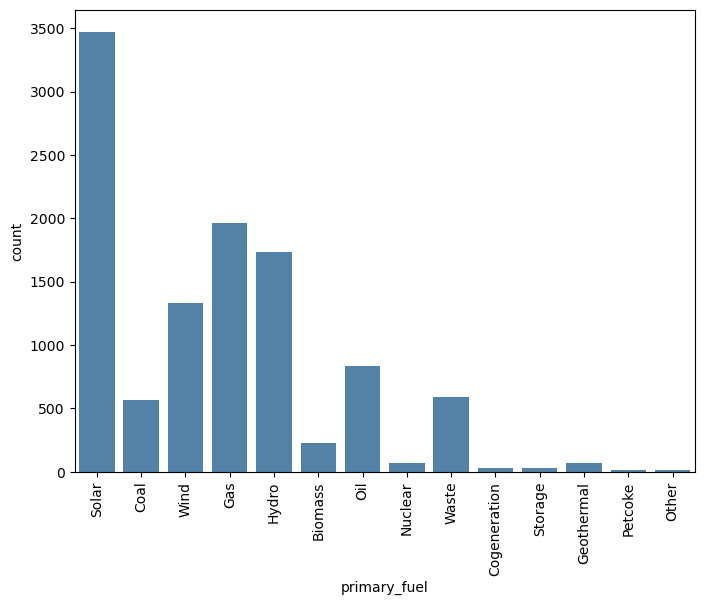

In [70]:
plt.figure(figsize=(8,6))
sns.countplot(x='primary_fuel',data=df,color='Steelblue')
plt.xticks(rotation=90)
plt.show()

- We can observe biasness in the target column.
- The count of solar as primary fuel is highest. 
- Gas, wind and hydro moderate count as primary fuel in the dataset.
- Low count of coal, biomass, waste as primary fuel also present in the dataset.
- A very low count of primary fuel such as nuclear, storage, cogeneration, Geothermal, petcoke also present in the dataset.

Visualising the count of other_fuel1 using countplot

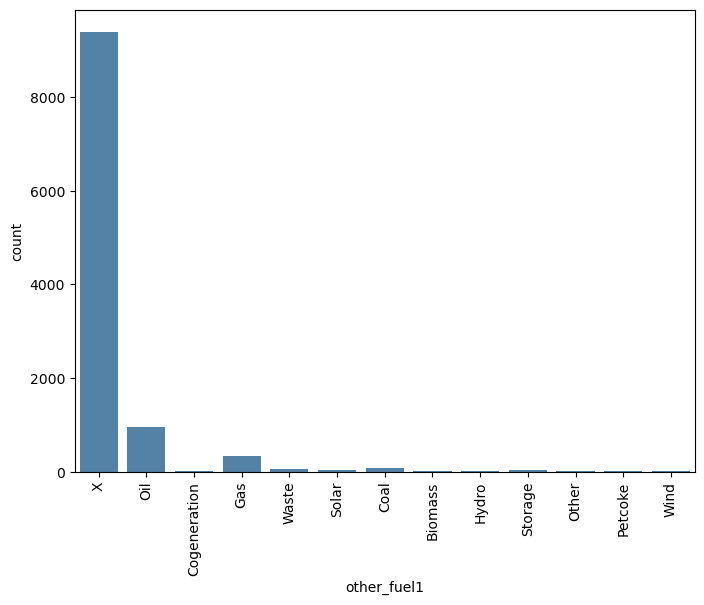

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(x='other_fuel1',data=df,color='Steelblue')
plt.xticks(rotation=90)
plt.show()

- Most of the power plants donot use secondary fuel. 
- Oil has the highest count as secondary fuel amoung secondary fuels.
- Gas is also used as secondary fuel.
- There are other fuels used as secondary fuel however the count is very low.

Visualising the count of other_fuel2 using countplot

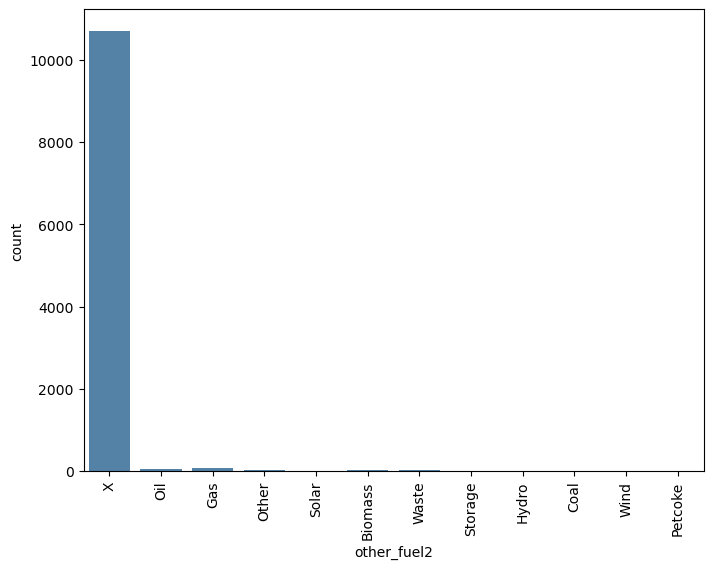

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(x='other_fuel2',data=df,color='Steelblue')
plt.xticks(rotation=90)
plt.show()

- Most of the power plants donot use third type of fuel in their power plant.
- Oil, gas biomass are used as thrid fuel for power generation. However their count is very low. 

Visualising the count of other_fuel3 using countplot

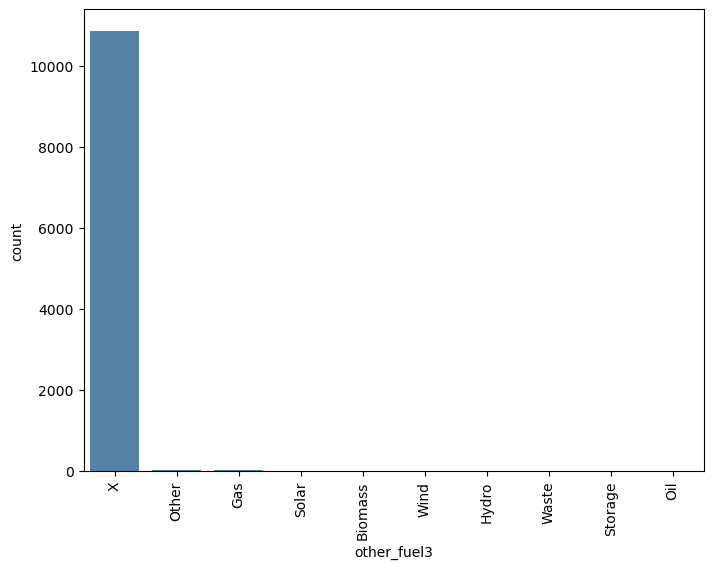

In [73]:
plt.figure(figsize=(8,6))
sns.countplot(x='other_fuel3',data=df,color='Steelblue')
plt.xticks(rotation=90)
plt.show()

- Most of the power plants donot use fourth fuel type in their power plant.
- We can observe that gas is used as fourth fuel type power generation. However the count is very low.

Visualising the count of country using countplot

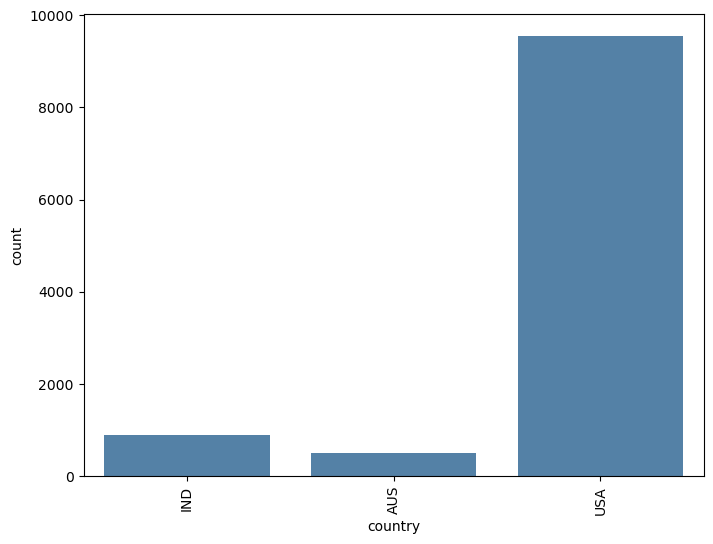

In [74]:
plt.figure(figsize=(8,6))
sns.countplot(x='country',data=df,color='Steelblue')
plt.xticks(rotation=90)
plt.show()

- Count of power plants from USA is very high compared to India and Australia.
- The dataset is very biased as per the country column. 

Visualizing capacity_mw using histplot 

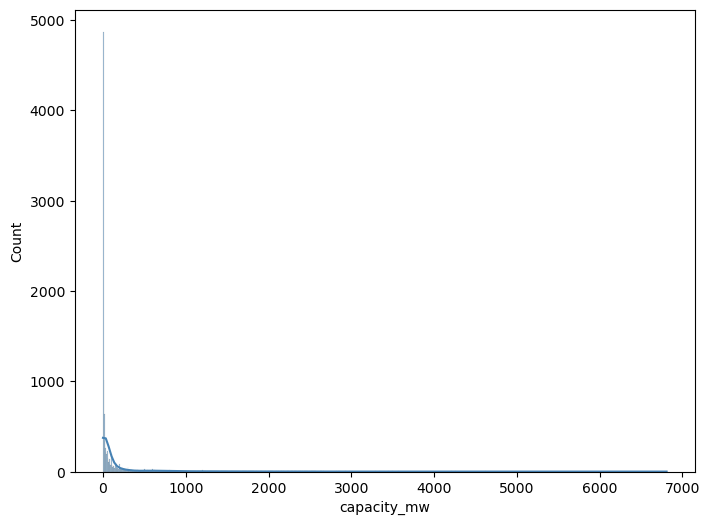

In [75]:
plt.figure(figsize=(8,6))
sns.histplot(x='capacity_mw',kde=True,data=df,color='Steelblue')
plt.show()

- We can observe that target capacity_mw is highly right skewed. 
- There are 0 value present can be observed in capacity_mw column.

Visualizing generation_gwh_2013 using histplot

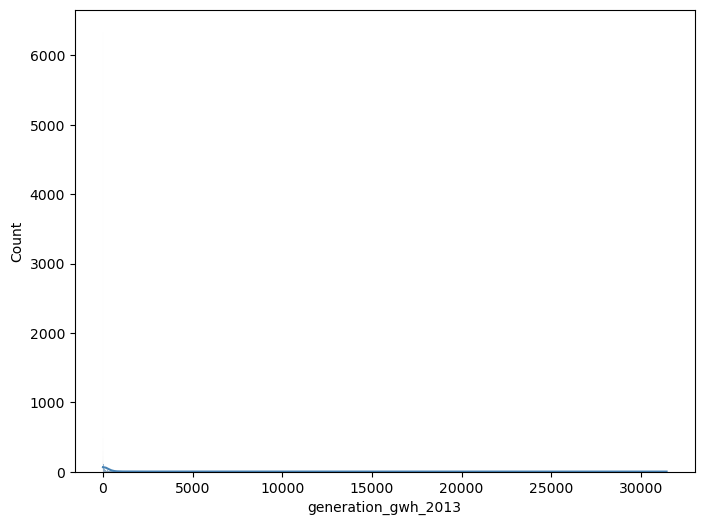

In [76]:
plt.figure(figsize=(8,6))
sns.histplot(x='generation_gwh_2013',kde=True,data=df,color='Steelblue')
plt.show()

- The generation_gwh_2013 is right skewed. Need to perform further analysis.

Visualizing generation_gwh_2014 using histplot

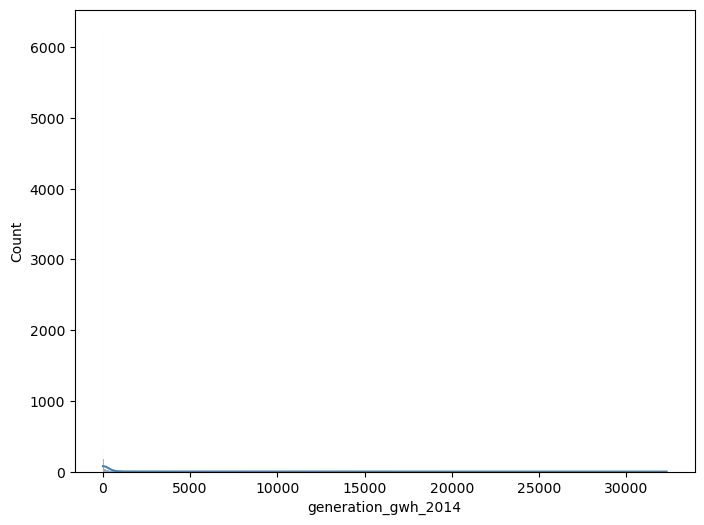

In [77]:
plt.figure(figsize=(8,6))
sns.histplot(x='generation_gwh_2014',kde=True,data=df,color='Steelblue')
plt.show()

- The generation_gwh_2014 is right skewed. Need to perform further analysis.

Visualizing generation_gwh_2015 using histplot

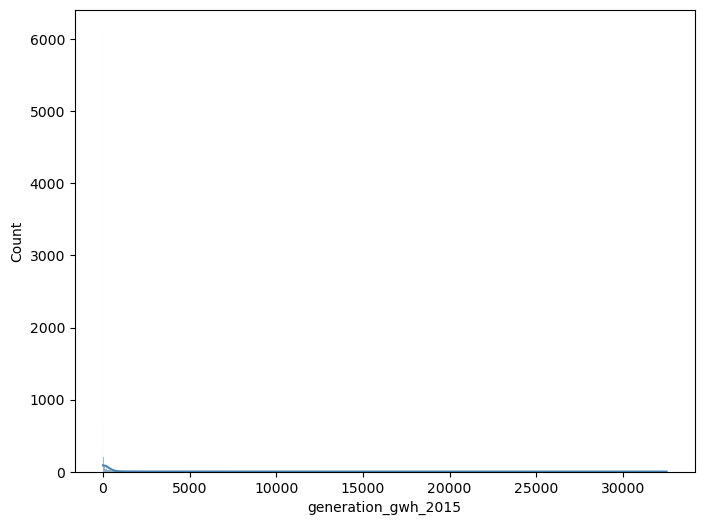

In [78]:
plt.figure(figsize=(8,6))
sns.histplot(x='generation_gwh_2015',kde=True,data=df,color='Steelblue')
plt.show()

- The generation_gwh_2015 is right skewed. Need to perform further analysis.

Visualizing generation_gwh_2016 using histplot

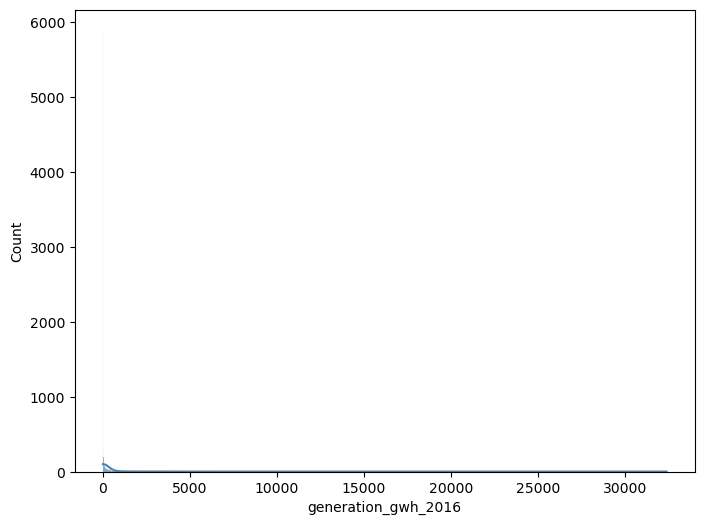

In [79]:
plt.figure(figsize=(8,6))
sns.histplot(x='generation_gwh_2016',kde=True,data=df,color='Steelblue')
plt.show()

- The generation_gwh_2016 is right skewed. Need to perform further analysis.

Visualizing generation_gwh_2017 using histplot

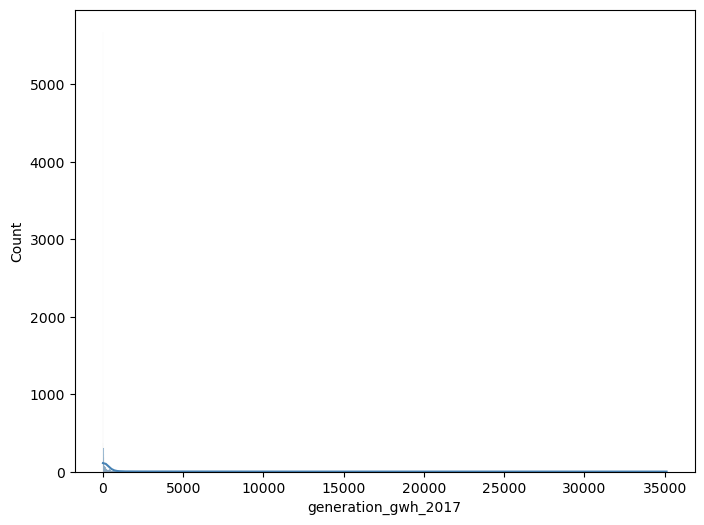

In [80]:
plt.figure(figsize=(8,6))
sns.histplot(x='generation_gwh_2017',kde=True,data=df,color='Steelblue')
plt.show()

- The generation_gwh_2017 is right skewed. Need to perform further analysis.

Visualizing generation_gwh_2018 using histplot

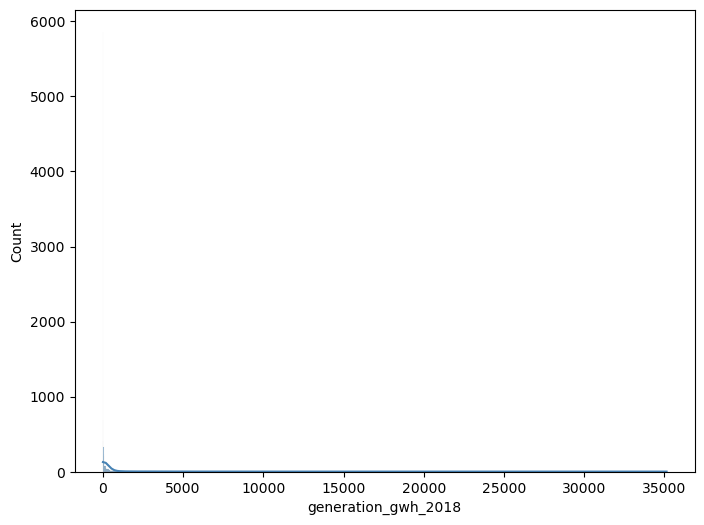

In [81]:
plt.figure(figsize=(8,6))
sns.histplot(x='generation_gwh_2018',kde=True,data=df,color='Steelblue')
plt.show()

- The generation_gwh_2018 is right skewed. Need to perform further analysis.

Visualizing generation_gwh_2018 using histplot

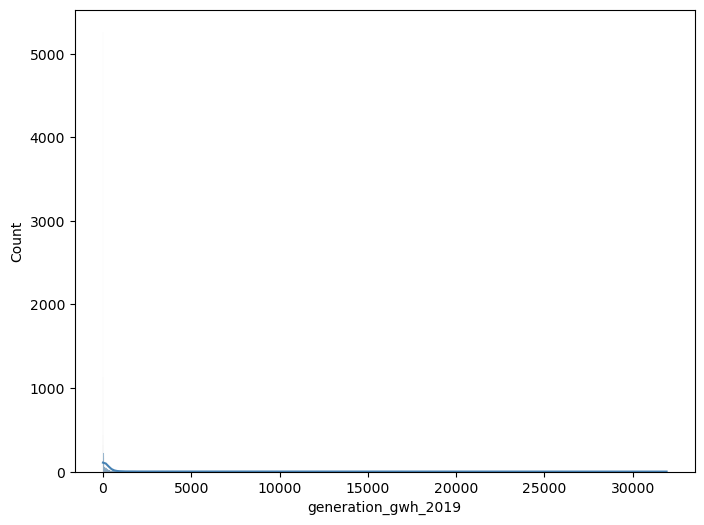

In [82]:
plt.figure(figsize=(8,6))
sns.histplot(x='generation_gwh_2019',kde=True,data=df,color='Steelblue')
plt.show()

- The generation_gwh_2019 is right skewed. Need to perform further analysis.

Bivariate analysis

Visualising countrywise primary fuel used 

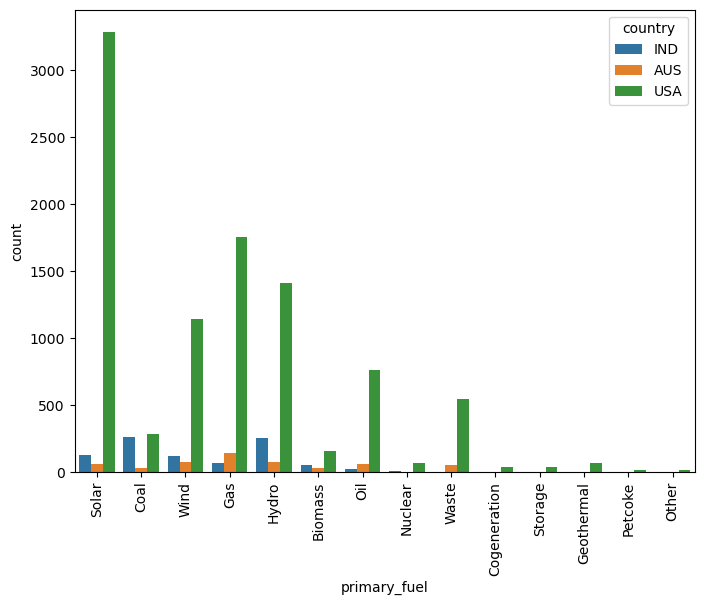

In [83]:
plt.figure(figsize=(8,6))
sns.countplot(x='primary_fuel',hue='country',data=df)
plt.xticks(rotation=90)
plt.show()

- We have observed in the dataset that most of the data is from USA compared to India and Australia. Hence, the dataset is baised.  
- Solar energy is highest used as primary fuel by power plants in USA. Gas is the next primary fuel after solar. 
- In USA, many power plants also use Hydro, wind, Oil for electricity. Waste is also used as primary fuel for generating electricity.
- A very low number of power plants use primary fuels such as biomass, nuclear, storage, cogeneration, gepthermal.
- Power plants in India use mostly hydro and coal as primary fuel.
- We can observe that power plants in India also use solar, wind, gas as primary fuel. 
- A low number of power plant in India also uses biomass, oil and nuclear as primary fuel.
- Gas is highest used as primary fuel by power plants in Australia. 
- Power plants in Australia also uses extensively solar, wind, hydro, oil, waste as primary fuel.
- A few power plants also uses coal and biomass as primary fuel.

Visualizing countrywise other_fuel1

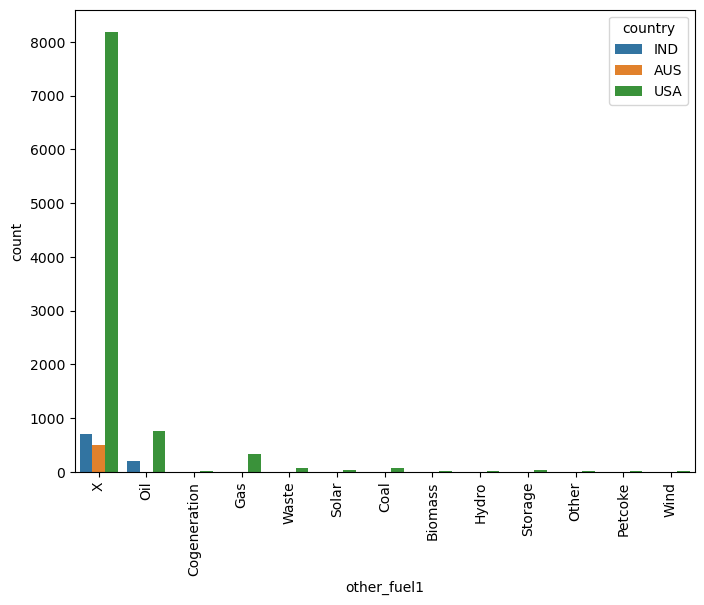

In [84]:
plt.figure(figsize=(8,6))
sns.countplot(x='other_fuel1',hue='country',data=df)
plt.xticks(rotation=90)
plt.show()

- Power plants in USA uses oil in high numbers as secondary fuel for electricity generation.
- Power plants in USA also uses gas extensively as secondary fuel.
- Waste, solar, coal, storage are also used as secondary fuel in USA.
- Power plants in India uses oil in high numbers as secondary fuel.

Visualizing countrywise other_fuel2

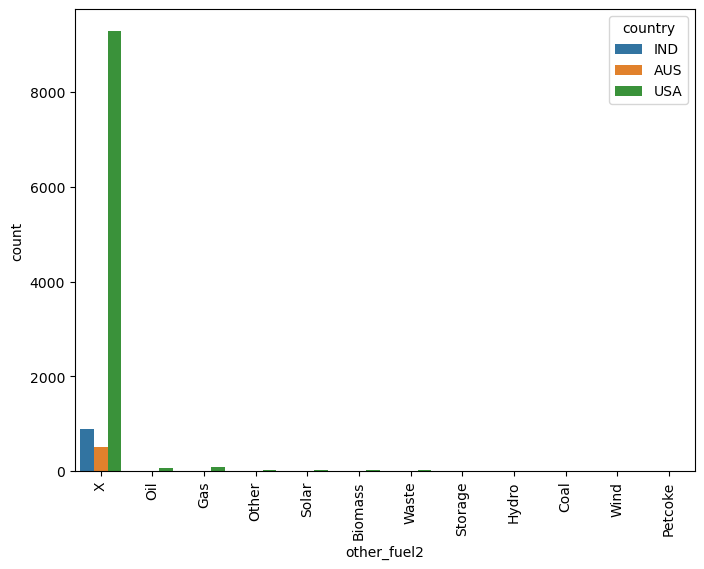

In [85]:
plt.figure(figsize=(8,6))
sns.countplot(x='other_fuel2',hue='country',data=df)
plt.xticks(rotation=90)
plt.show()

- We can observe that only USA uses third type fuel for electricity generation. 
- A very few power plants uses oil, gas, solar, biomass and waste as thrid type of fuel.

Visualizing countrywise other_fuel3

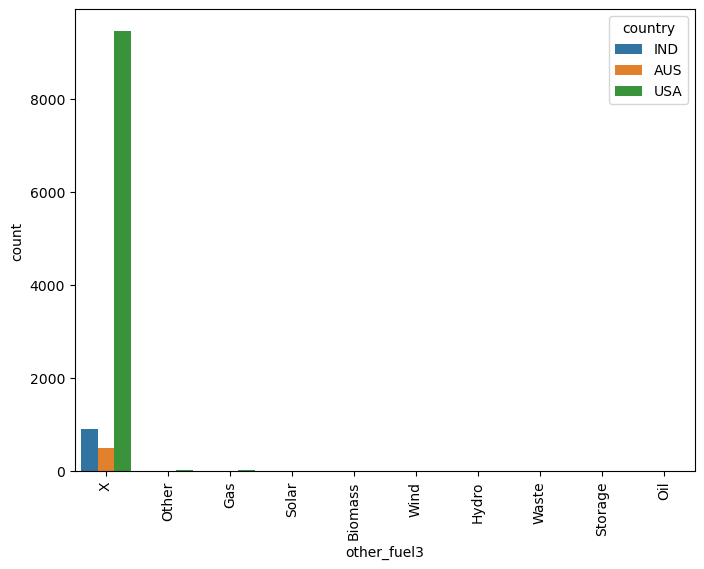

In [86]:
plt.figure(figsize=(8,6))
sns.countplot(x='other_fuel3',hue='country',data=df)
plt.xticks(rotation=90)
plt.show()

- A very few power plants in USA uses fourth fuel type for electricity generation.
- We can observe that power plants from India and Australia does not use fourth fuel type.

Visualising generation_gwh with capacity_mw using regplot

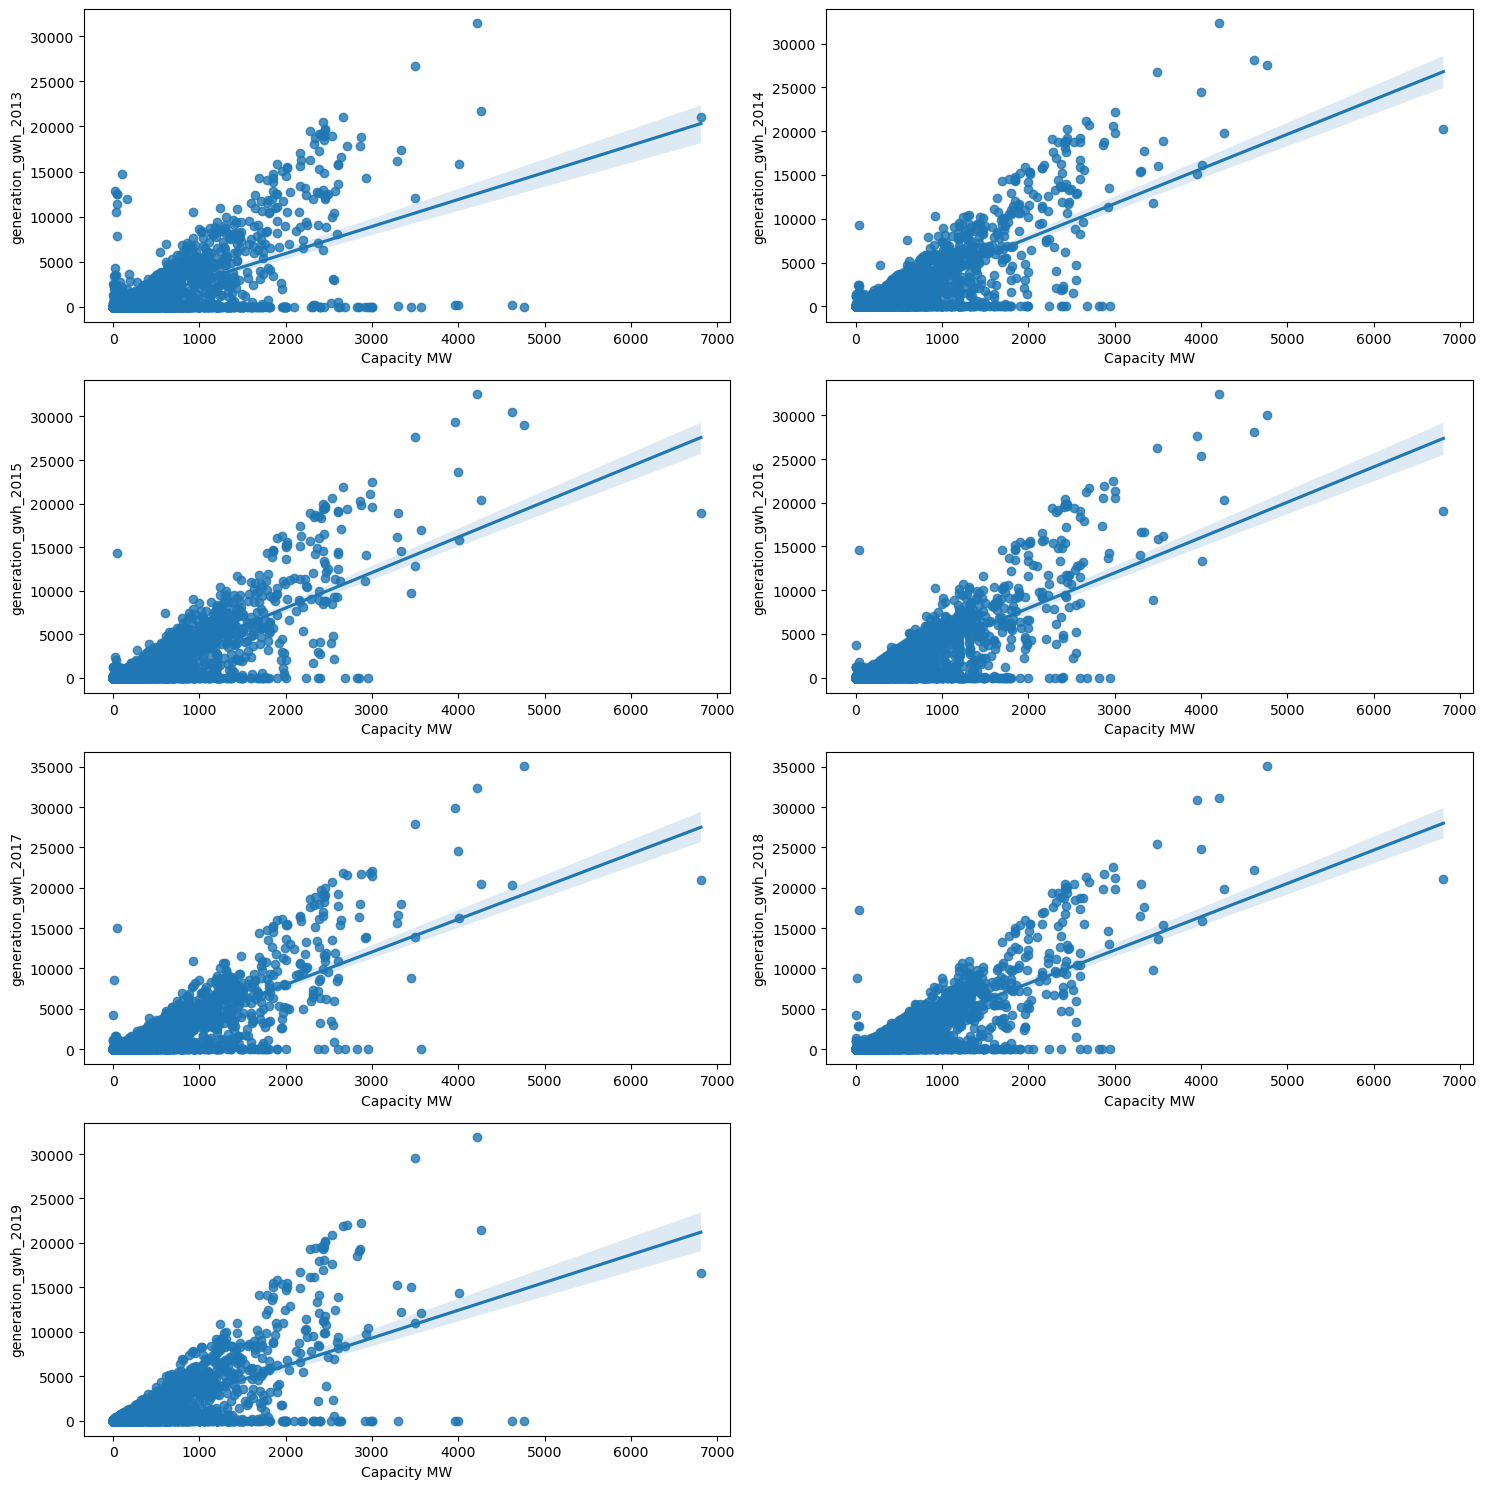

In [87]:
generation_gwh=[column for column in num_columns if column not in 'capacity_mw']
plt.figure(figsize=(15,15))
for index,column in enumerate(generation_gwh):
    if index<=len(generation_gwh):
        plt.subplot((len(generation_gwh)+1)//2,2,index+1)
        sns.regplot(x='capacity_mw',y=column,data=df)
        plt.xlabel('Capacity MW')
        plt.ylabel(column)
plt.tight_layout()
plt.show()

- We can observe positive correlation amoung capacity_mw and generation_gwh columns

Visualising countrywise total electricity producing capacity using barplot

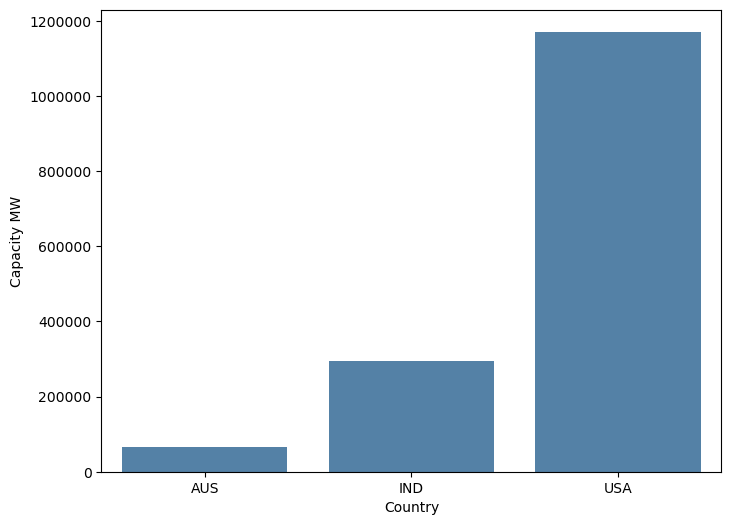

In [88]:
plt.figure(figsize=(8,6))
total_capacity_by_country=df.groupby('country')['capacity_mw'].sum().reset_index()
sns.barplot(data=total_capacity_by_country,x='country',y='capacity_mw',color='Steelblue')
plt.xlabel('Country')
plt.ylabel('Capacity MW')
plt.ticklabel_format(style='plain',axis='y')

- USA has the highest electricity producing capacity amoung the three. India is second prodicing electricity. Australia has the least electricity producing capacity. 

Visualising countrywise total electricity production each year using barplot

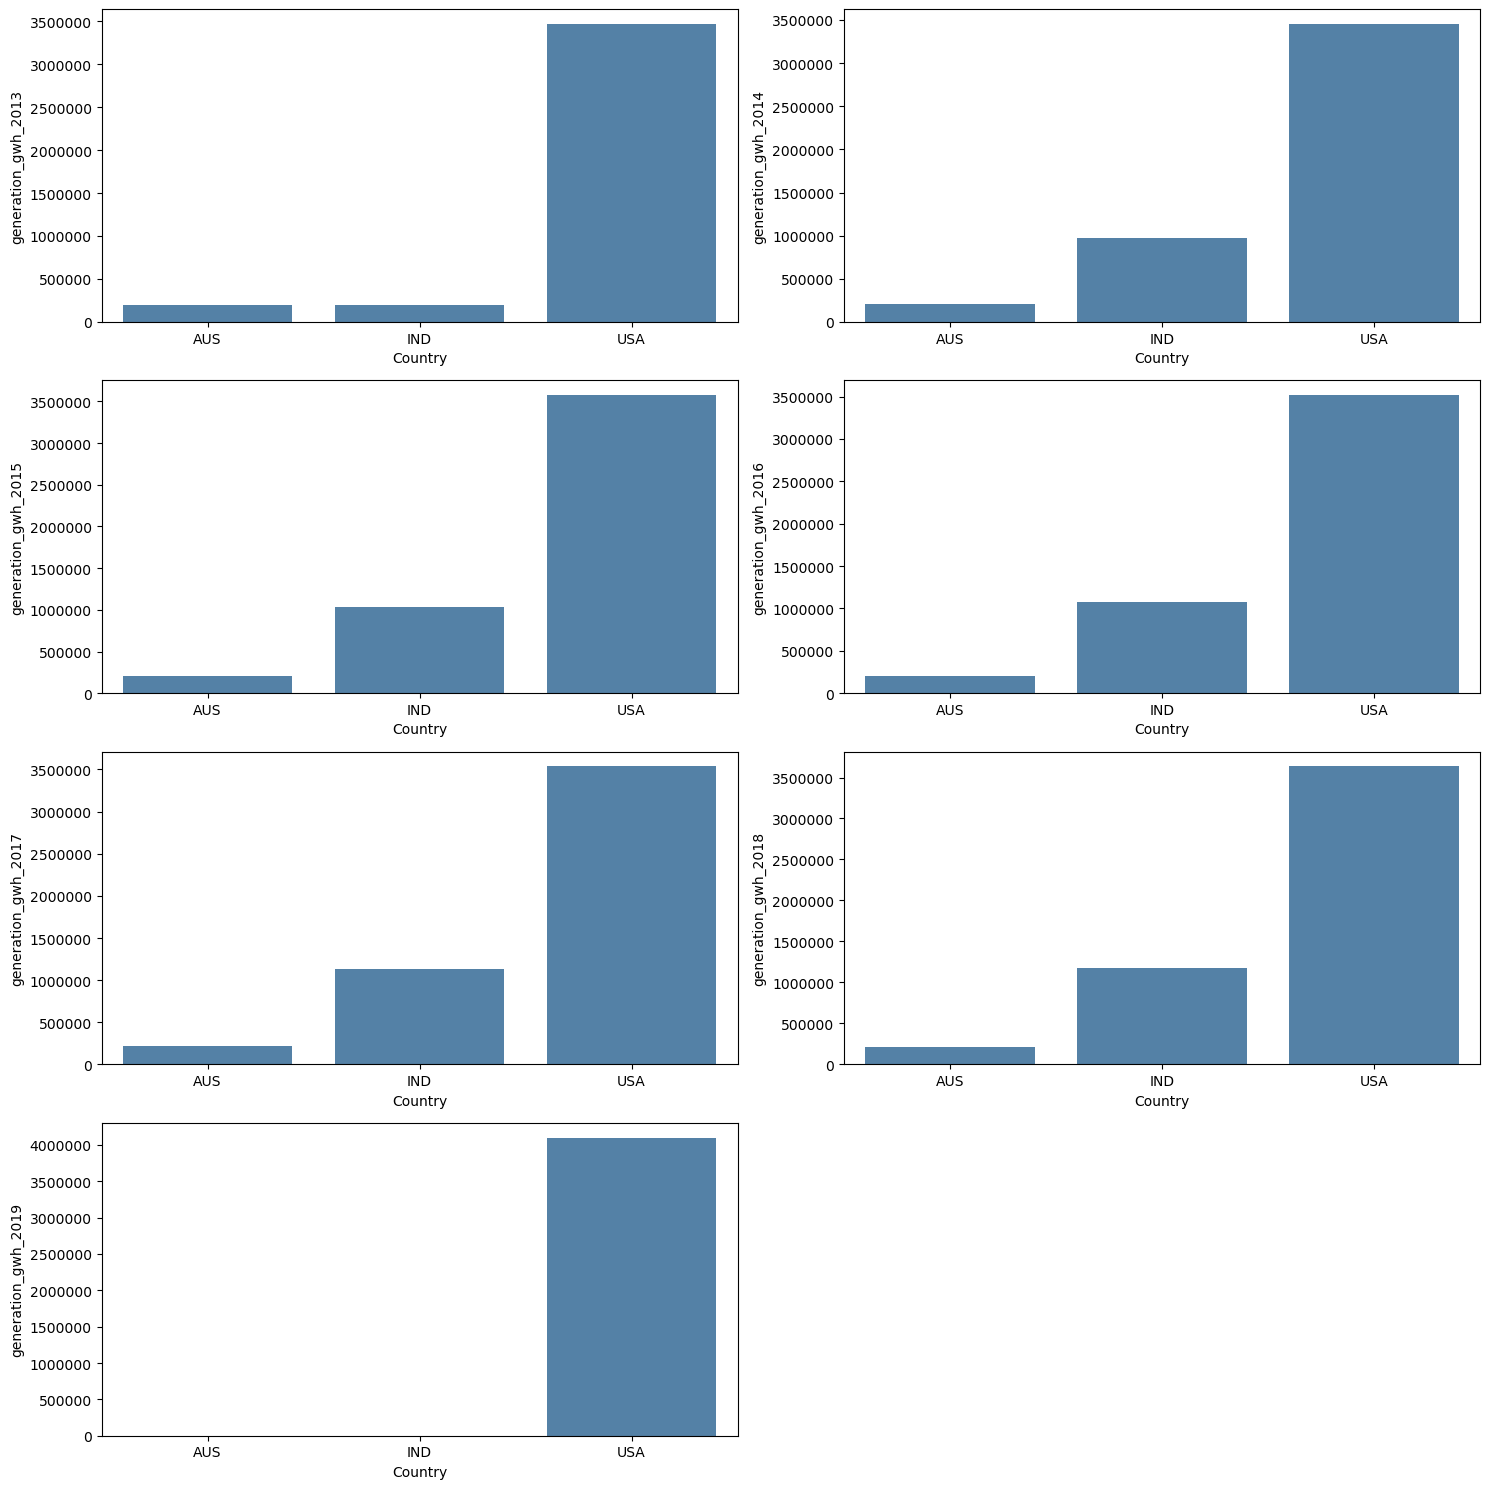

In [89]:
generation_gwh=[column for column in num_columns if column not in 'capacity_mw']
plt.figure(figsize=(15,15))
for index,column in enumerate(generation_gwh):
    if index<=len(generation_gwh):
        total_production_by_country=df.groupby('country')[column].sum().reset_index()
        plt.subplot((len(generation_gwh)+1)//2,2,index+1)
        sns.barplot(data=total_production_by_country,x='country',y=column,color='Steelblue')
        plt.xlabel('Country')
        plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()
plt.show()

- Throughout all the barplots USA has the highest electricity production.
- For the year 2013, Autralia and India shows equal electricity production.
- From the year 2014 to 2018, electricity production in India is very high comapared to Australia.
- For the year 2019, data is not available for India and Australia.

Multivariate analysis

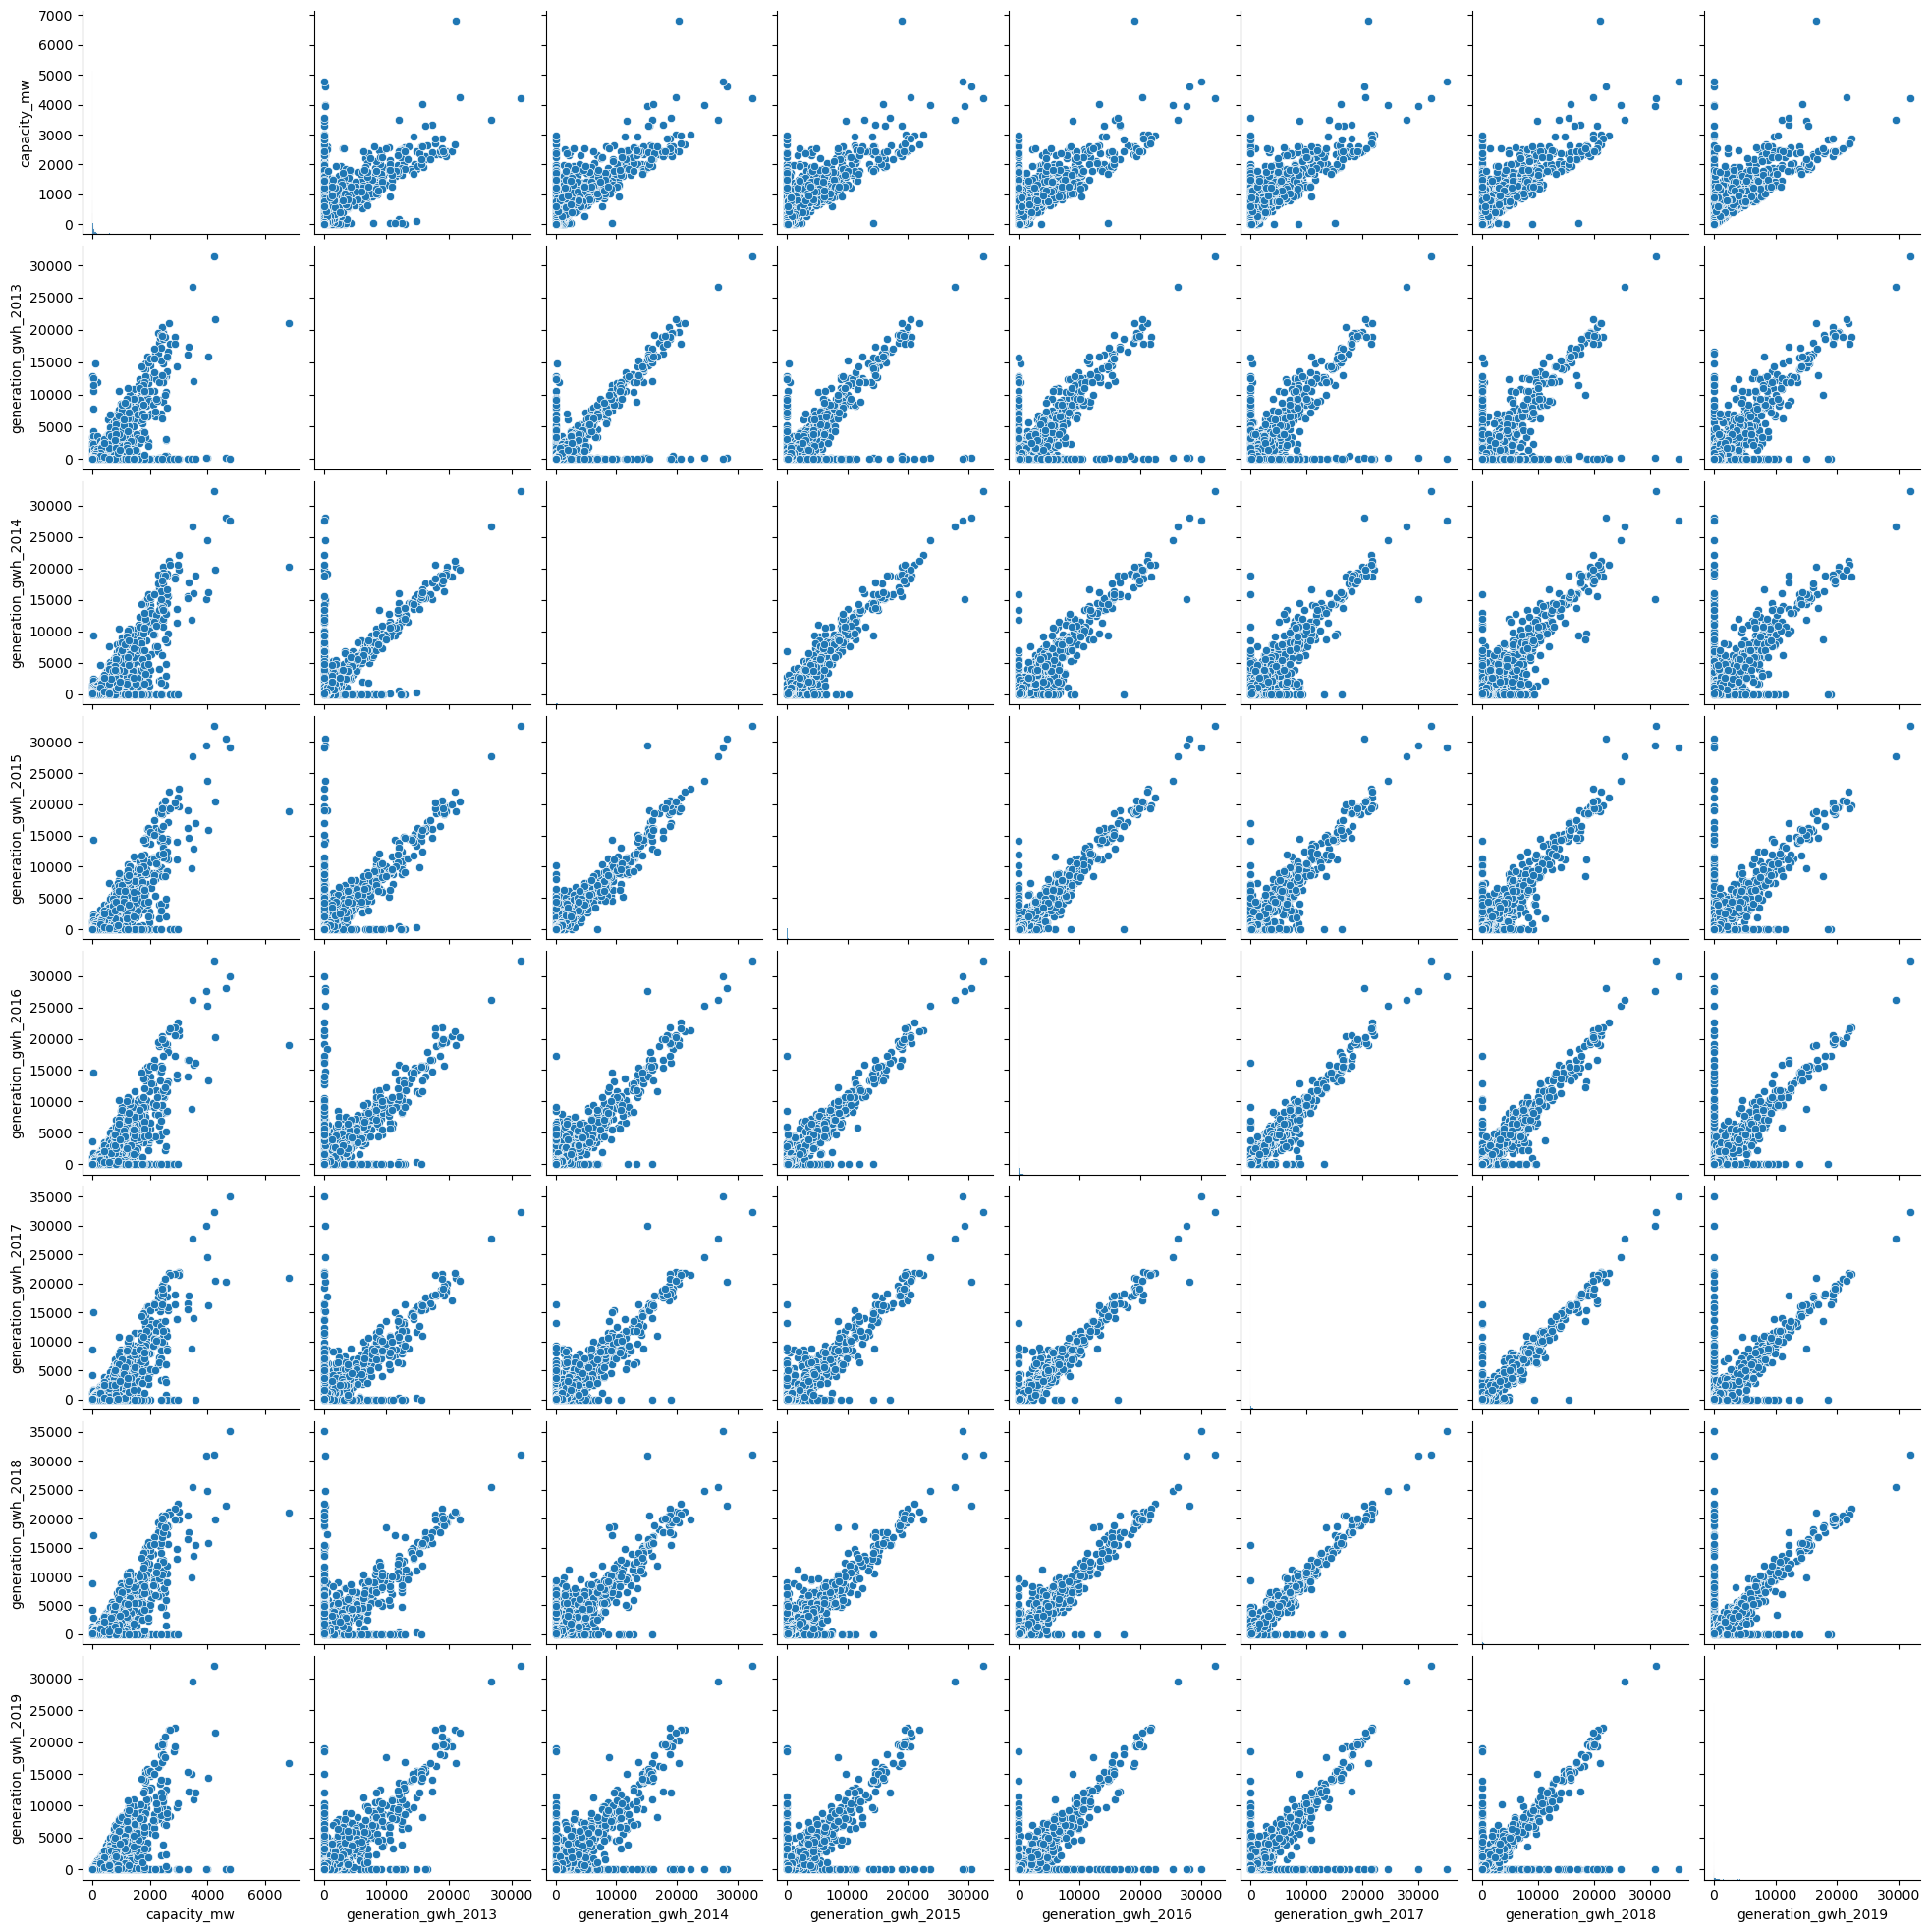

In [90]:
sns.pairplot(df)

#### Checking for outliers

Checking outliers using Boxplot

In [91]:
data=df.copy()

In [92]:
def outliers_boxplot(data):
    plt.figure(figsize=(10,15))
    for index,feature in enumerate(num_columns):
        plt.subplot((len(num_columns)//3)+1,3,index+1)
        sns.boxplot(data[feature],palette='deep',linewidth=.2)
        plt.xlabel(feature)
        plt.ticklabel_format(style='plain',axis='y')
    plt.tight_layout()

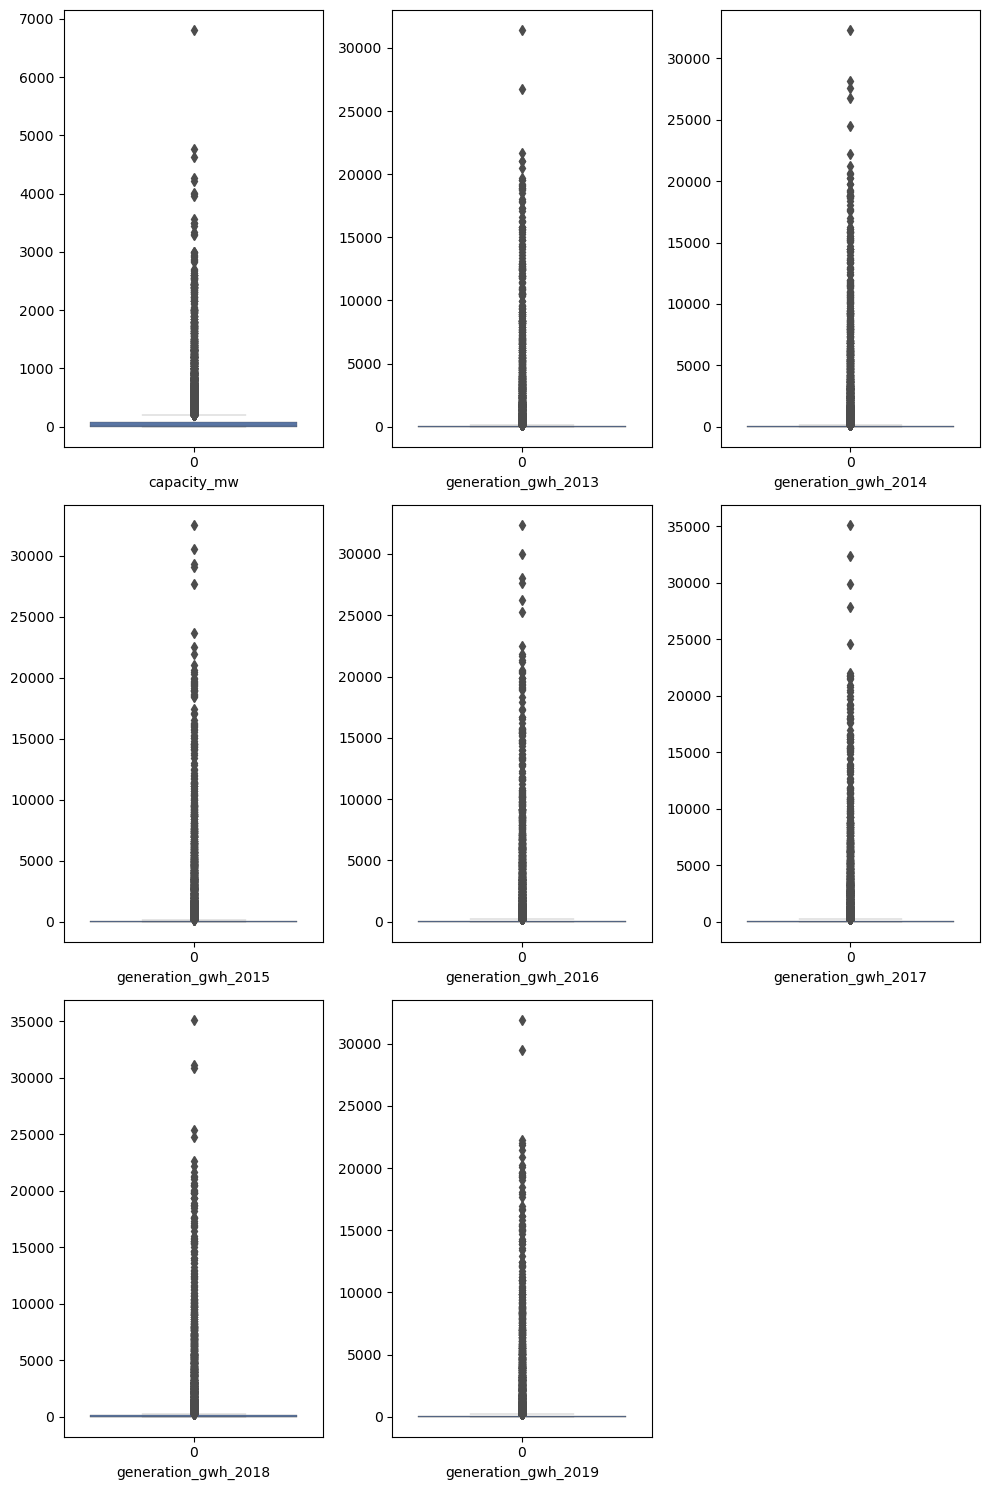

In [93]:
outliers_boxplot(data)

- We can observe outliers present in all the columns.

Analyzing outliers using zscore

In [94]:
def outliers_detection(data):
    rev_num_columns=[column for column in num_columns if column not in ['capacity_mw']]
    z_score=np.abs(zscore(data[rev_num_columns]))
    print(np.where(z_score>3))
    return z_score

In [95]:
z_score=outliers_detection(data)

(array([    4,     4,    12, ..., 10826, 10830, 10930], dtype=int64), array([3, 5, 1, ..., 6, 6, 6], dtype=int64))


Removing outliers

In [96]:
def removing_outliers(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [97]:
data=removing_outliers(z_score,data)

Checking total data loss after removing outliers

In [98]:
total_data_loss=df.shape[0]-data.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 368


Checking total percentage of data loss after removing outliers

In [99]:
total_data=df.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 3.36%


- Total data lost after outliers removal is 3.36% which is under acceptable range.

Checking outliers through IQR method

In [100]:
rev_num_columns=[column for column in num_columns if column not in ['capacity_mw']]
Q1 = df[rev_num_columns].quantile(0.25)
Q3 = df[rev_num_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (df[rev_num_columns] >= lower_bound) & (df[rev_num_columns] <= upper_bound)

df_no_outliers = df[bounds.all(axis=1)]

In [101]:
total_data_loss=df.shape[0]-df_no_outliers.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 2972


In [102]:
total_data=df.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 27.13%


- Total data lost after outliers removal is 27.13% which is very high data loss.
- Hence we will use zscore to to remove outliers

Apply zscore to df

In [103]:
df=data.reset_index(drop=True)

Checking the revised shape of df

In [104]:
df.shape

(10587, 13)

#### Checking the skewness

In [105]:
df[rev_num_columns].skew()

generation_gwh_2013    5.587453
generation_gwh_2014    5.261632
generation_gwh_2015    5.160193
generation_gwh_2016    5.259266
generation_gwh_2017    5.152295
generation_gwh_2018    4.996978
generation_gwh_2019    5.370946
dtype: float64

- We can observe skewness in all the columns. All columns are right skewed.

Applying sqrt to remove skewness

In [106]:
skewness_check_sqrt=np.sqrt(df[rev_num_columns])
skewness_check_sqrt.skew()

generation_gwh_2013    3.019701
generation_gwh_2014    2.872513
generation_gwh_2015    2.856532
generation_gwh_2016    2.791949
generation_gwh_2017    2.716923
generation_gwh_2018    2.661313
generation_gwh_2019    2.837242
dtype: float64

Applying cbrt to remove skewness

In [107]:
skewness_check_cbrt=np.cbrt(df[rev_num_columns])
skewness_check_cbrt.skew()

generation_gwh_2013    1.896098
generation_gwh_2014    1.816264
generation_gwh_2015    1.794878
generation_gwh_2016    1.720908
generation_gwh_2017    1.668035
generation_gwh_2018    1.650390
generation_gwh_2019    1.759446
dtype: float64

Applying log to remove skewness

In [108]:
skewness_check_log=np.log(df[rev_num_columns]+.1)
skewness_check_log.skew()

generation_gwh_2013    0.578659
generation_gwh_2014    0.478240
generation_gwh_2015    0.383739
generation_gwh_2016    0.243133
generation_gwh_2017    0.134511
generation_gwh_2018    0.051175
generation_gwh_2019    0.022135
dtype: float64

- We can observe by applying log we can remove the skewness from the columns. Hence we will use log to remove skewness from the dataset.

Applying log to remove skewness

In [109]:
df[rev_num_columns]=skewness_check_log

Checking skewness level after applying log

In [110]:
df[rev_num_columns].skew()

generation_gwh_2013    0.578659
generation_gwh_2014    0.478240
generation_gwh_2015    0.383739
generation_gwh_2016    0.243133
generation_gwh_2017    0.134511
generation_gwh_2018    0.051175
generation_gwh_2019    0.022135
dtype: float64

- We can observe that the skewness is under acceptable range.

Dropping the column Country

- The column country has no role in predicting the capacity_mw and primary_fuel. Hence we can drop it.

In [111]:
df.drop('country',axis=1,inplace=True)

Creating 2 copies of the dataset for each regression and classification prediction

In [112]:
df_reg=df.copy()
df_cls=df.copy()

### Linear Regression - Predicting capacity_mw

Performing Label Encoding of categorical columns

In [113]:
cat_columns=[column for column in df.columns if df_reg[column].dtypes=='O']

In [114]:
le=LabelEncoder()
df_reg[cat_columns]=df_reg[cat_columns].apply(lambda x: le.fit_transform(x))

Verifying the dataset after label encoding 

In [115]:
df_reg

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,10,12,11,9,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
1,98.0,1,12,11,9,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
2,39.2,13,12,11,9,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
3,135.0,3,12,11,9,0.922118,6.426309,6.737971,6.786835,6.498093,6.439892,-2.302585
4,250.0,1,5,11,9,0.487352,7.050574,7.097509,7.069759,7.045788,6.884236,-2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...
10582,596.7,3,5,11,9,-2.302585,4.155063,4.886839,6.076711,-2.302585,6.258679,6.392738
10583,7.0,12,12,11,9,3.777165,3.896584,3.845862,3.751385,3.657621,3.420837,3.124433
10584,3.4,13,12,11,9,1.327340,0.940066,0.951272,0.570980,0.287800,1.004302,0.270790
10585,1.0,10,12,11,9,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,0.231905,0.524137


#### Analysing the dataset through correlation

<Axes: >

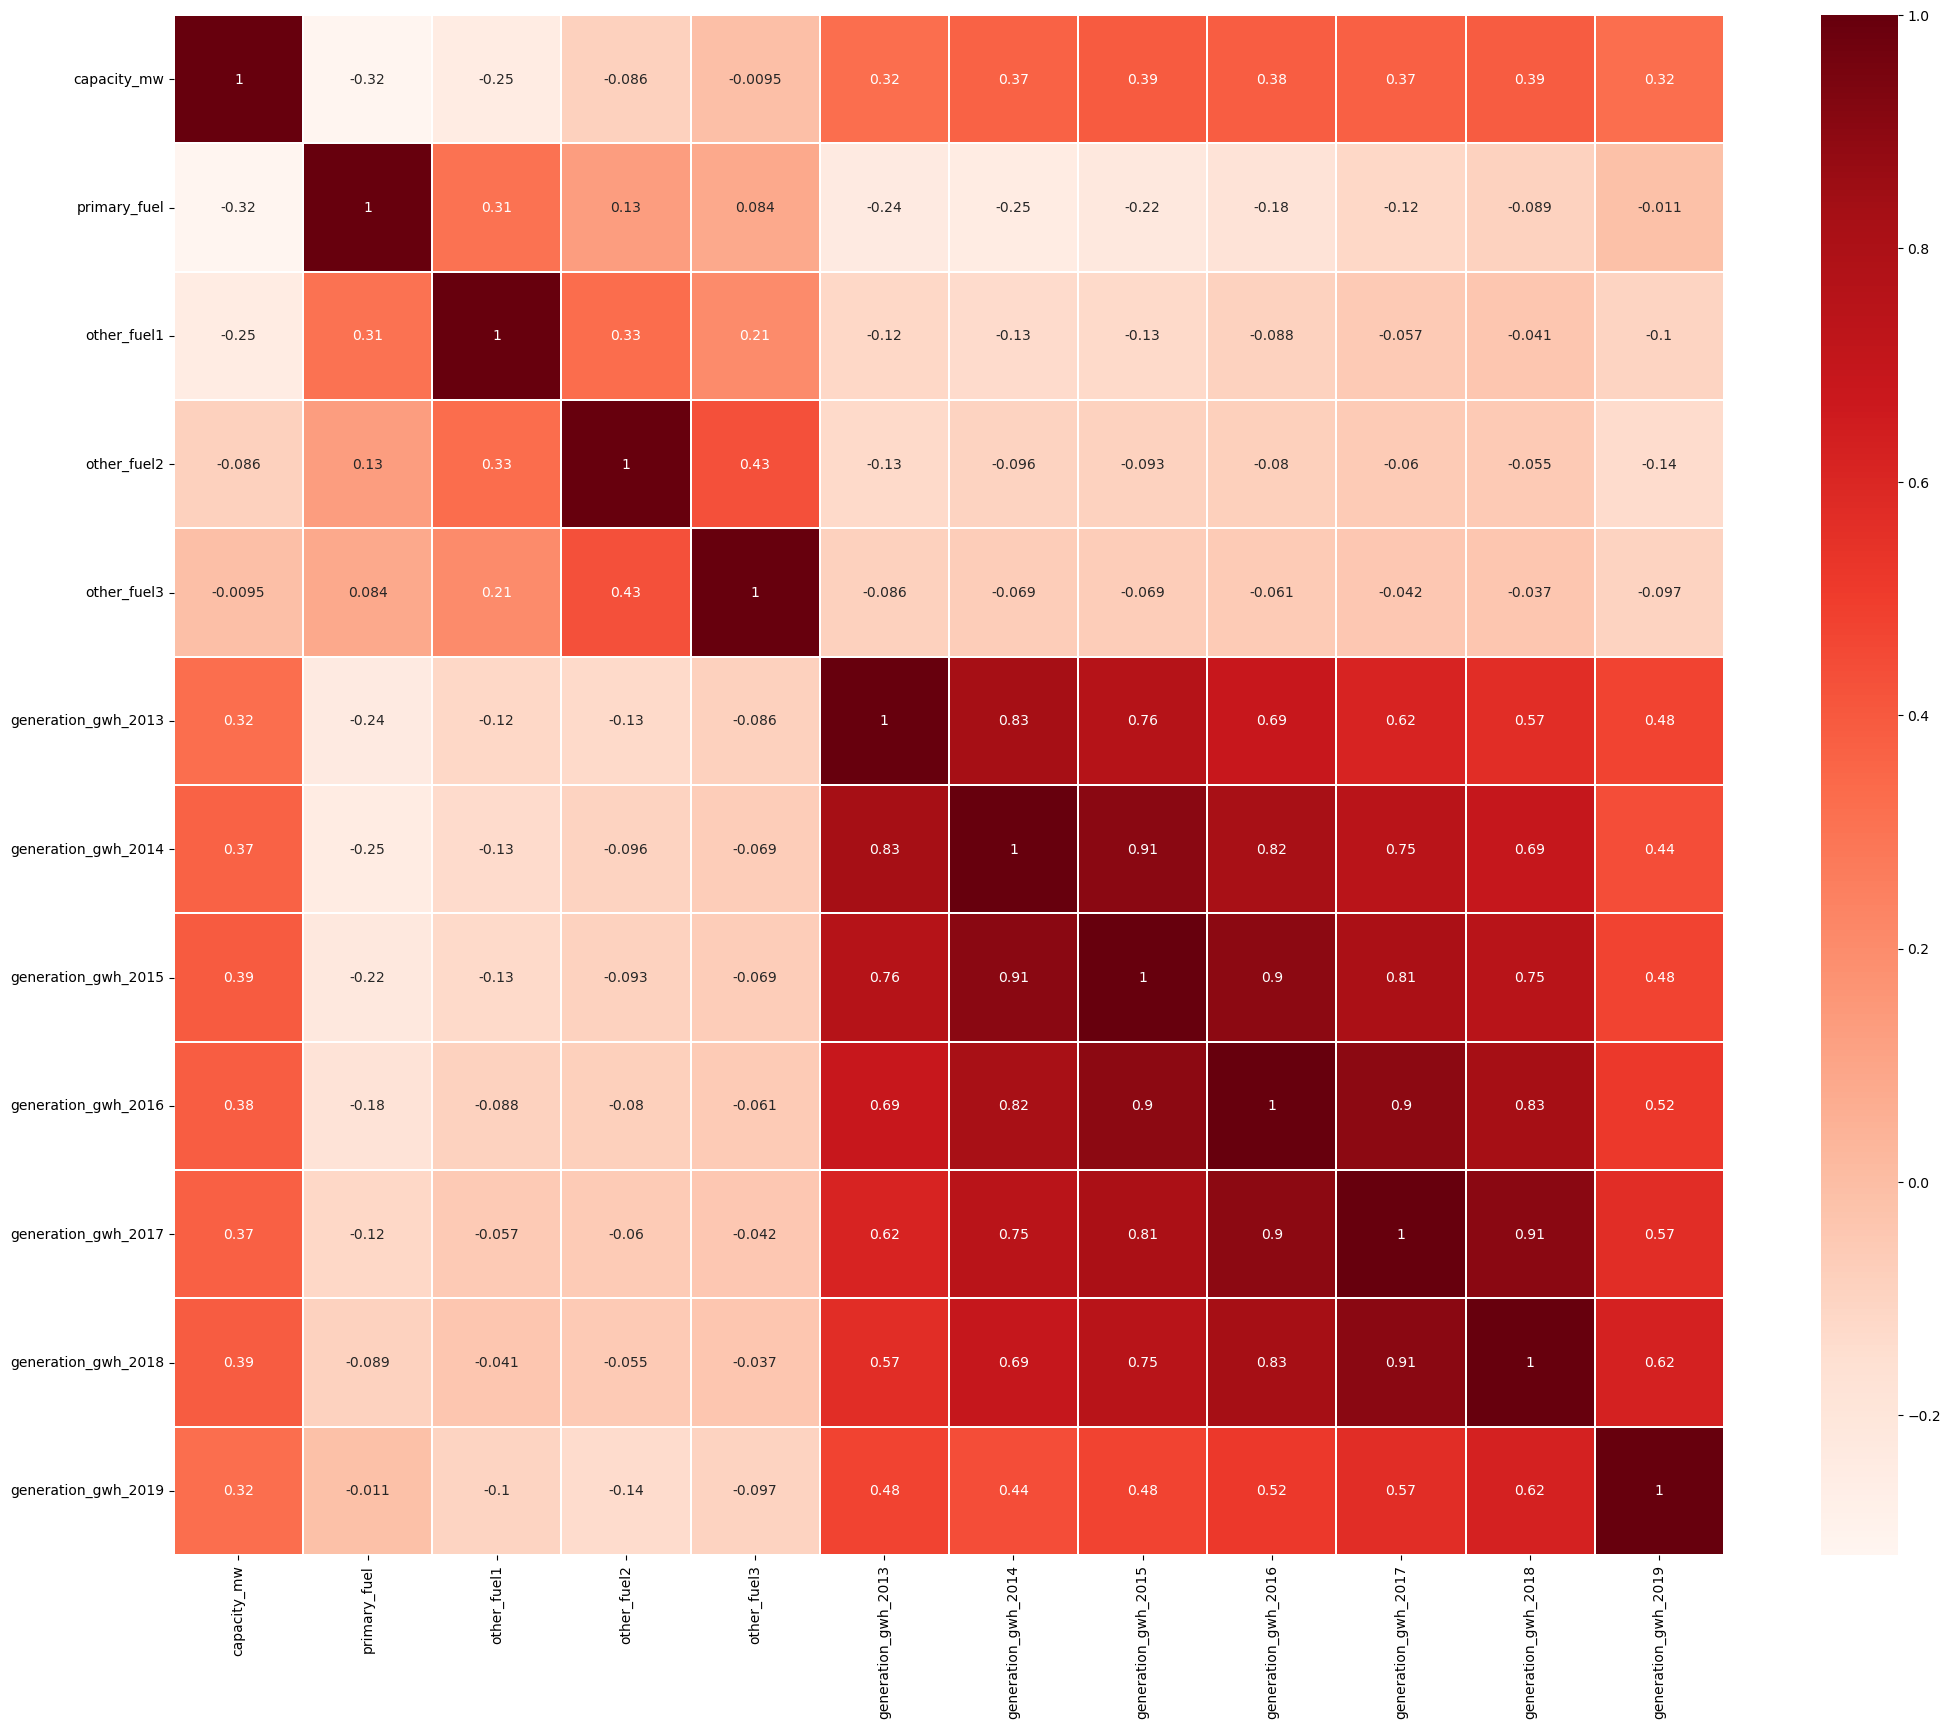

In [116]:
plt.figure(figsize=(25,20))
sns.heatmap(df_reg.corr(),annot=True,fmt='.2g',linewidth=.2,cmap='Reds')

- Not much high correlation can be observed with capacity_mw.
- Columns primary_fuel, other_fuel1, other_fuel2 has negative correlation with capacity_mw.
- generation_gwh columns has low correalation with the target capacity_mw.
- primary_fuel has very low negative correlation with generation_gwh columns.
- primary_fuel has low positve correlation with other_fuel1, other_fuel2 and other_fuel3.
- There is high correlation among columns generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017.

Separating dependent and independent variables

In [117]:
x=df_reg.drop('capacity_mw',axis=1)
y=df_reg['capacity_mw']

#### Feature Scaling

In [118]:
def scaling_stdScaler(x):
    st=StandardScaler()
    x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
    return x

In [119]:
scaling_stdScaler(x)

,primary_fuel,other_fuel1,other_fuel2,other_fuel3,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.629041,0.371443,0.143419,0.085804,-0.891808,-0.951524,-1.018115,-1.126773,-1.234266,-1.352991,-1.475176
1,-1.736269,0.371443,0.143419,0.085804,-0.891808,-0.951524,-1.018115,-1.126773,-1.234266,-1.352991,-1.475176
2,1.417478,0.371443,0.143419,0.085804,-0.891808,-0.951524,-1.018115,-1.126773,-1.234266,-1.352991,-1.475176
3,-1.210644,0.371443,0.143419,0.085804,0.067126,1.611689,1.656548,1.618664,1.494669,1.440306,-1.475176
4,-1.736269,-2.377713,0.143419,0.085804,-0.062161,1.795003,1.762918,1.704121,1.664500,1.582278,-1.475176
...,...,...,...,...,...,...,...,...,...,...,...
10582,-1.210644,-2.377713,0.143419,0.085804,-0.891808,0.944745,1.108887,1.404173,-1.234266,1.382407,1.486925
10583,1.154666,0.371443,0.143419,0.085804,0.916135,0.868843,0.800913,0.701814,0.613889,0.475692,0.373563
10584,1.417478,0.371443,0.143419,0.085804,0.187627,0.000671,-0.055457,-0.258820,-0.431033,-0.296412,-0.598544
10585,0.629041,0.371443,0.143419,0.085804,-0.891808,-0.951524,-1.018115,-1.126773,-1.234266,-0.543199,-0.512240


#### Variance Inflation Factor

In [120]:
def vif_cal(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF Factors']=[VIF(x.values,i) for i in range(x.shape[1])]
    
    return vif

In [121]:
vif_cal(x)

,Features,VIF Factors
0,primary_fuel,5.966472
1,other_fuel1,24.579489
2,other_fuel2,120.318638
3,other_fuel3,114.996244
4,generation_gwh_2013,3.596890
5,generation_gwh_2014,8.225768
6,generation_gwh_2015,10.675306
7,generation_gwh_2016,11.016658
8,generation_gwh_2017,11.740729
9,generation_gwh_2018,8.792290


- We can observe very high variance inflation in columns other_fuel2, other_fuel3.
- Columns other_fuel1, generation_gwh_2016, generation_gwh_2017 has slightly high variance inflation.
- Hence, we can drop the column other_fuel3 and check the variance level.

Dropping other_fuel3 column

In [122]:
x.drop('other_fuel3',axis=1,inplace=True)

Checking variance inflation

In [123]:
vif_cal(x)

,Features,VIF Factors
0,primary_fuel,5.953733
1,other_fuel1,24.129697
2,other_fuel2,23.395971
3,generation_gwh_2013,3.594397
4,generation_gwh_2014,8.225404
5,generation_gwh_2015,10.674197
6,generation_gwh_2016,11.016657
7,generation_gwh_2017,11.738944
8,generation_gwh_2018,8.791555
9,generation_gwh_2019,2.607627


- After dropping other_fuel3, the variance inflation is still high in columns other_fuel1, other_fuel2.
- Hence we will drop column other_fuel2

Dropping other_fuel2 column

In [124]:
x.drop('other_fuel2',axis=1,inplace=True)

Checking variance inflation

In [125]:
vif_cal(x)

,Features,VIF Factors
0,primary_fuel,5.795251
1,other_fuel1,5.926340
2,generation_gwh_2013,3.585341
3,generation_gwh_2014,8.202421
4,generation_gwh_2015,10.658099
5,generation_gwh_2016,11.016440
6,generation_gwh_2017,11.735889
7,generation_gwh_2018,8.790911
8,generation_gwh_2019,2.581212


- We can observe slightly high variance inflation in columns generation_gwh_2016 and generation_gwh_2017. 
- Hence we will drop generation_gwh_2017.

Dropping column generation_gwh_2017

In [126]:
x.drop('generation_gwh_2017',axis=1,inplace=True)

Checking variance inflation

In [127]:
vif_cal(x)

,Features,VIF Factors
0,primary_fuel,5.790053
1,other_fuel1,5.921943
2,generation_gwh_2013,3.585340
3,generation_gwh_2014,8.196857
4,generation_gwh_2015,10.645640
5,generation_gwh_2016,8.475001
6,generation_gwh_2018,5.358848
7,generation_gwh_2019,2.581198


- We can observe that the variance inflation is within the acceptable range.

### Modelling

In [128]:
def random_state_cal(x,y):
    best_randomstate = None
    best_score = 0
    
    for rs in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=rs)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('R2 Score :{} Random state :{}'.format(best_score,best_randomstate))

In [129]:
random_state_cal(x,y)

R2 Score :0.3161246134330046 Random state :10


Applying train_test_split with test_size=.30 and random_state=10

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=29)

Linear Regression Model

In [131]:
def linear_regression(x_train,x_test,y_train,y_test):
    
    model_lr=LinearRegression()
    model_lr.fit(x_train,y_train)
    prediction_lr=model_lr.predict(x_test)
    prediction_y_train=model_lr.predict(x_train)
    
    r2=r2_score(y_test,prediction_lr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_lr)
    mse=mean_squared_error(y_test,prediction_lr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_lr))
    prediction_chart=pd.DataFrame({'Linear Regression':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_lr 

In [132]:
prediction_chart,prediction_lr=linear_regression(x_train,x_test,y_train,y_test)
prediction_chart

,Linear Regression,Scores
0,R2 Score,27.114006
1,R2 Score on Training Data,27.149270
2,Mean Absolute Error,95.883796
3,Mean Squared Error,28428.902654
4,Root Mean Squared Error,168.608727


Lasso Regression

In [133]:
def lasso(x_train,x_test,y_train,y_test):
    
    model_lasso=Lasso()
    model_lasso.fit(x_train,y_train)
    prediction_las=model_lasso.predict(x_test)
    prediction_y_train=model_lasso.predict(x_train)
    
    r2=r2_score(y_test,prediction_las) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_las)
    mse=mean_squared_error(y_test,prediction_las)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_las))
    prediction_chart=pd.DataFrame({'Lasso':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_las

In [134]:
prediction_chart,prediction_las=lasso(x_train,x_test,y_train,y_test)
prediction_chart

,Lasso,Scores
0,R2 Score,27.113064
1,R2 Score on Training Data,27.145541
2,Mean Absolute Error,95.745217
3,Mean Squared Error,28429.269913
4,Root Mean Squared Error,168.609816


Ridge Regression

In [135]:
def ridge(x_train,x_test,y_train,y_test):
    
    model_ridge=Ridge()
    model_ridge.fit(x_train,y_train)
    prediction_ridge=model_ridge.predict(x_test)
    prediction_y_train=model_ridge.predict(x_train)
    
    r2=r2_score(y_test,prediction_ridge) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_ridge)
    mse=mean_squared_error(y_test,prediction_ridge)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_ridge))
    prediction_chart=pd.DataFrame({'Ridge':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_ridge

In [136]:
prediction_chart,prediction_ridge=ridge(x_train,x_test,y_train,y_test)
prediction_chart

,Ridge,Scores
0,R2 Score,27.114034
1,R2 Score on Training Data,27.149270
2,Mean Absolute Error,95.883572
3,Mean Squared Error,28428.891905
4,Root Mean Squared Error,168.608695


Random Forest

In [137]:
def random_forest(x_train,x_test,y_train,y_test):
    
    model_ran_forest=RandomForestRegressor()
    model_ran_forest.fit(x_train,y_train)
    prediction_rf=model_ran_forest.predict(x_test)
    prediction_y_train=model_ran_forest.predict(x_train)
    
    r2=r2_score(y_test,prediction_rf) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_rf)
    mse=mean_squared_error(y_test,prediction_rf)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_rf))
    prediction_chart=pd.DataFrame({'Random Forest':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_rf

In [138]:
prediction_chart, prediction_rf=random_forest(x_train,x_test,y_train,y_test)
prediction_chart

,Random Forest,Scores
0,R2 Score,71.005172
1,R2 Score on Training Data,92.297929
2,Mean Absolute Error,38.451652
3,Mean Squared Error,11309.321520
4,Root Mean Squared Error,106.345294


KNN Regression

In [139]:
def knn(x_train,x_test,y_train,y_test):
    
    model_knn=KNN()
    model_knn.fit(x_train,y_train)
    prediction_knn=model_knn.predict(x_test)
    prediction_y_train=model_knn.predict(x_train)
    
    r2=r2_score(y_test,prediction_knn) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_knn)
    mse=mean_squared_error(y_test,prediction_knn)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_knn))
    prediction_chart=pd.DataFrame({'KNN':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_knn

In [140]:
prediction_chart,prediction_knn=knn(x_train,x_test,y_train,y_test)
prediction_chart

,KNN,Scores
0,R2 Score,59.753081
1,R2 Score on Training Data,72.149893
2,Mean Absolute Error,42.497452
3,Mean Squared Error,15698.156504
4,Root Mean Squared Error,125.292284


SVR Regression

In [141]:
def svr(x_train,x_test,y_train,y_test):
    
    model_svr=SVR()
    model_svr.fit(x_train,y_train)
    prediction_svr=model_svr.predict(x_test)
    prediction_y_train=model_svr.predict(x_train)
    
    r2=r2_score(y_test,prediction_svr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_svr)
    mse=mean_squared_error(y_test,prediction_svr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_svr))
    prediction_chart=pd.DataFrame({'SVR':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_svr

In [142]:
prediction_chart, prediction_svr=svr(x_train,x_test,y_train,y_test)
prediction_chart

,SVR,Scores
0,R2 Score,19.153639
1,R2 Score on Training Data,18.307457
2,Mean Absolute Error,62.873543
3,Mean Squared Error,31533.813187
4,Root Mean Squared Error,177.577626


Decision Tree Regressor

In [143]:
def decision_tree(x_train,x_test,y_train,y_test):
    
    model_dt=DTR()
    model_dt.fit(x_train,y_train)
    prediction_dt=model_dt.predict(x_test)
    prediction_y_train=model_dt.predict(x_train)
    
    r2=r2_score(y_test,prediction_dt) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_dt)
    mse=mean_squared_error(y_test,prediction_dt)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_dt))
    prediction_chart=pd.DataFrame({'Decision Tree':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_dt

In [144]:
prediction_chart, prediction_dt=decision_tree(x_train,x_test,y_train,y_test)
prediction_chart

,Decision Tree,Scores
0,R2 Score,39.392628
1,R2 Score on Training Data,96.341474
2,Mean Absolute Error,51.808398
3,Mean Squared Error,23639.673035
4,Root Mean Squared Error,153.751985


Gradient Boosting Regressor

In [145]:
def gradient_boosting(x_train,x_test,y_train,y_test):
    
    model_gbr=GradientBoostingRegressor()
    model_gbr.fit(x_train,y_train)
    prediction_gb=model_gbr.predict(x_test)
    prediction_y_train=model_gbr.predict(x_train)
    
    r2=r2_score(y_test,prediction_gb) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_gb)
    mse=mean_squared_error(y_test,prediction_gb)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_gb))
    prediction_chart=pd.DataFrame({'Gradient Boosting Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_gb

In [146]:
prediction_chart, prediction_gb=gradient_boosting(x_train,x_test,y_train,y_test)
prediction_chart

,Gradient Boosting Regressor,Scores
0,R2 Score,67.460721
1,R2 Score on Training Data,75.641784
2,Mean Absolute Error,44.103509
3,Mean Squared Error,12691.821235
4,Root Mean Squared Error,112.657983


ExtraTrees Regression

In [147]:
def extra_trees_regressor(x_train,x_test,y_train,y_test):
    
    model_etr=ExtraTreesRegressor()
    model_etr.fit(x_train,y_train)
    prediction_etr=model_etr.predict(x_test)
    prediction_y_train=model_etr.predict(x_train)
    
    r2=r2_score(y_test,prediction_etr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_etr)
    mse=mean_squared_error(y_test,prediction_etr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_etr))
    prediction_chart=pd.DataFrame({'Extra Trees Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_etr

In [148]:
prediction_chart, prediction_etr=extra_trees_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,Extra Trees Regressor,Scores
0,R2 Score,68.973303
1,R2 Score on Training Data,96.341474
2,Mean Absolute Error,38.530791
3,Mean Squared Error,12101.844320
4,Root Mean Squared Error,110.008383


AdaBoost Regressor

In [149]:
def adaboost_regressor(x_train,x_test,y_train,y_test):
    
    model_abr=AdaBoostRegressor()
    model_abr.fit(x_train,y_train)
    prediction_abr=model_abr.predict(x_test)
    prediction_y_train=model_abr.predict(x_train)
    
    r2=r2_score(y_test,prediction_abr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_abr)
    mse=mean_squared_error(y_test,prediction_abr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_abr))
    prediction_chart=pd.DataFrame({'AdaBoostRegressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_abr

In [150]:
prediction_chart, prediction_abr=adaboost_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,AdaBoostRegressor,Scores
0,R2 Score,-118.722658
1,R2 Score on Training Data,-93.276290
2,Mean Absolute Error,210.370041
3,Mean Squared Error,85311.934556
4,Root Mean Squared Error,292.082068


SGD Regressor

In [151]:
def sgd_regressor(x_train,x_test,y_train,y_test):
    
    model_sgd=SGDRegressor()
    model_sgd.fit(x_train,y_train)
    prediction_sgd=model_sgd.predict(x_test)
    prediction_y_train=model_sgd.predict(x_train)
    
    r2=r2_score(y_test,prediction_sgd) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_sgd)
    mse=mean_squared_error(y_test,prediction_sgd)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_sgd))
    prediction_chart=pd.DataFrame({'SGDRegressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_sgd

In [152]:
prediction_chart, prediction_sgd=sgd_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,SGDRegressor,Scores
0,R2 Score,17.943488
1,R2 Score on Training Data,17.631547
2,Mean Absolute Error,124.060153
3,Mean Squared Error,32005.828035
4,Root Mean Squared Error,178.901727


Poisson Regressor

In [153]:
def poisson_regressor(x_train,x_test,y_train,y_test):
    
    model_pr=PoissonRegressor()
    model_pr.fit(x_train,y_train)
    prediction_pr=model_pr.predict(x_test)
    prediction_y_train=model_pr.predict(x_train)
    
    r2=r2_score(y_test,prediction_pr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_pr)
    mse=mean_squared_error(y_test,prediction_pr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_pr))
    prediction_chart=pd.DataFrame({'PoissonRegressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_pr

In [154]:
prediction_chart, prediction_pr=poisson_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,PoissonRegressor,Scores
0,R2 Score,37.913823
1,R2 Score on Training Data,37.523605
2,Mean Absolute Error,73.798495
3,Mean Squared Error,24216.475575
4,Root Mean Squared Error,155.616437


Cross validating the models

In [155]:
def cross_validation(x,y,*args):
    
    # Cross validation for LinearRegression
    cv_score_lr= cross_val_score(LinearRegression(),x,y,cv=5, scoring='r2')
    cv_r2_score_lr=cv_score_lr.mean()
    r2_lr=r2_score(y_test,prediction_lr)
    score_diff_lr=(r2_lr-cv_r2_score_lr)
    
    # Cross validation for Lasso
    cv_score_las= cross_val_score(Lasso(),x,y,cv=5, scoring='r2')
    cv_r2_score_las=cv_score_las.mean()
    r2_las=r2_score(y_test,prediction_las)
    score_diff_las=(r2_las-cv_r2_score_las)
    
    # Cross validation for Ridge
    cv_score_ridge= cross_val_score(Ridge(),x,y,cv=5, scoring='r2')
    cv_r2_score_ridge=cv_score_ridge.mean()
    r2_ridge=r2_score(y_test,prediction_ridge)
    score_diff_ridge=(r2_ridge-cv_r2_score_ridge)
    
    # Cross validation for Random Forest
    cv_score_rf= cross_val_score(RandomForestRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_rf=cv_score_rf.mean()
    r2_rf=r2_score(y_test,prediction_rf)
    score_diff_rf=(r2_rf-cv_r2_score_rf)
    
    # Cross validation for KNN
    cv_score_knn= cross_val_score(KNN(),x,y,cv=5, scoring='r2')
    cv_r2_score_knn=cv_score_knn.mean()
    r2_knn=r2_score(y_test,prediction_knn)
    score_diff_knn=(r2_knn-cv_r2_score_knn)
    
    # Cross validation for SVR
    cv_score_svr= cross_val_score(SVR(),x,y,cv=5, scoring='r2')
    cv_r2_score_svr=cv_score_svr.mean()
    r2_svr=r2_score(y_test,prediction_svr)
    score_diff_svr=(r2_svr-cv_r2_score_svr)
    
    # Cross validation for Decision Tree
    cv_score_dt= cross_val_score(DTR(),x,y,cv=5, scoring='r2')
    cv_r2_score_dt=cv_score_dt.mean()
    r2_dt=r2_score(y_test,prediction_dt)
    score_diff_dt=(r2_dt-cv_r2_score_dt)
    
    # Cross validation for GradientBoost
    cv_score_gb= cross_val_score(GradientBoostingRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_gb=cv_score_gb.mean()
    r2_gb=r2_score(y_test,prediction_gb)
    score_diff_gb=(r2_gb-cv_r2_score_gb)
    
    # Cross validation for ExtraTreesRegressor
    cv_score_etr= cross_val_score(ExtraTreesRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_etr=cv_score_etr.mean()
    r2_etr=r2_score(y_test,prediction_etr)
    score_diff_etr=(r2_etr-cv_r2_score_etr)
    
    # Cross validation for AdaBoostRegressor
    cv_score_abr= cross_val_score(AdaBoostRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_abr=cv_score_abr.mean()
    r2_abr=r2_score(y_test,prediction_abr)
    score_diff_abr=(r2_abr-cv_r2_score_abr)
    
    # Cross validation for SGDRegressor
    cv_score_sgd= cross_val_score(SGDRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_sgd=cv_score_sgd.mean()
    r2_sgd=r2_score(y_test,prediction_sgd)
    score_diff_sgd=(r2_sgd-cv_r2_score_sgd)
    
    # Cross validation for PoissonRegressor
    cv_score_pr= cross_val_score(PoissonRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_pr=cv_score_pr.mean()
    r2_pr=r2_score(y_test,prediction_pr)
    score_diff_pr=(r2_pr-cv_r2_score_pr)
    
    df=pd.DataFrame({'Regression Name':['LinearRegression',
                                        'Lasso',
                                        'Ridge',
                                        'Random Forest',
                                        'KNN',
                                        'SVR',
                                        'Decision Tree',
                                        'GradientBoost',
                                        'ExtraTreesRegressor',
                                        'AdaBoostRegressor',
                                        'SGDRegressor',
                                        'PoissonRegressor'
                                       ],
                     'Regression Score':[r2_lr,r2_las,r2_ridge,r2_rf,r2_knn,r2_svr,r2_dt,r2_gb,r2_etr,r2_abr,r2_sgd,r2_pr],
                     'Cross Val Score':[cv_r2_score_lr,cv_r2_score_las,cv_r2_score_ridge, cv_r2_score_rf,cv_r2_score_knn,
                                        cv_r2_score_svr,cv_r2_score_dt,cv_r2_score_gb,cv_r2_score_etr,cv_r2_score_abr,cv_r2_score_sgd,cv_r2_score_pr],
                     'Difference': [score_diff_lr,score_diff_las,score_diff_ridge,score_diff_rf,score_diff_knn,score_diff_svr,
                                    score_diff_dt,score_diff_gb,score_diff_etr,score_diff_abr,score_diff_sgd,score_diff_pr]
                    })
    return df

Creating the list for model prediction variables

In [156]:
pred=[prediction_lr, prediction_las, prediction_ridge, prediction_rf, prediction_knn,prediction_svr,prediction_dt, prediction_gb, prediction_etr, prediction_abr, prediction_sgd, prediction_pr]

In [157]:
cross_validation(x,y,y_test, *pred)

,Regression Name,Regression Score,Cross Val Score,Difference
0,LinearRegression,0.271140,0.124979,0.146161
1,Lasso,0.271131,0.129698,0.141433
2,Ridge,0.271140,0.124990,0.146150
3,Random Forest,0.710052,0.634109,0.075943
4,KNN,0.597531,0.553238,0.044293
5,SVR,0.191536,0.184328,0.007208
6,Decision Tree,0.393926,0.302412,0.091514
7,GradientBoost,0.674607,0.579752,0.094855
8,ExtraTreesRegressor,0.689733,0.613747,0.075986
9,AdaBoostRegressor,-1.187227,-0.876725,-0.310502


Based on the Regression Scores, Cross Val Scores and their differences Random Forest is the best model for the following reasons:
- High Performance: It has the highest Regression Score and a high Cross Validation Score, indicating strong performance on both training and unseen data.
- Consistency: The difference between the Regression Score and Cross Validation Score is moderate, suggesting that it is not overfitting significantly.
- Robustness: Random Forest is generally robust to overfitting due to its ensemble nature.

### GridSearchCV Hyperparameter Tuning

Creating dictionary of parameters for RandomForest regression model

In [158]:
parameters = {
    'n_estimators': [50,100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 3, 4, 5],
    'random_state': [10,42,45],
}

Applying GridSearchCV on the model

In [159]:
gridsearch_cv=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200],
                         'random_state': [10, 42, 45]})

Checking the best parameter

In [160]:
gridsearch_cv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 42}

## Creating the Final Model

In [167]:
final_model=RandomForestRegressor(criterion='squared_error',max_depth=None,max_features='sqrt',n_estimators=200, random_state=42)

In [168]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
r2=r2_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
rmse=np.sqrt(mean_absolute_error(y_test,pred))

prediction_chart=pd.DataFrame({'Final model (RandomForest)':['R2 Score',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,mae,mse,rmse]
                                  })
prediction_chart

,Final model (RandomForest),Scores
0,R2 Score,0.710600
1,Mean Absolute Error,38.122865
2,Mean Squared Error,11287.929645
3,Root Mean Squared Error,6.174372


#### Saving the model

In [169]:
import pickle

In [170]:
file='Global_Power_Plant_Prediction_capacity_mw.pkl'
pickle.dump(final_model,open(file,'wb'))

# Classification for predicting the Primary Fuel

For predicting the primary fuel we will use the dataframe df_cls which is created after removing the skewness

In [184]:
df_cls

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,Solar,X,X,X,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
1,98.0,Coal,X,X,X,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
2,39.2,Wind,X,X,X,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585
3,135.0,Gas,X,X,X,0.922118,6.426309,6.737971,6.786835,6.498093,6.439892,-2.302585
4,250.0,Coal,Oil,X,X,0.487352,7.050574,7.097509,7.069759,7.045788,6.884236,-2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...
10582,596.7,Gas,Oil,X,X,-2.302585,4.155063,4.886839,6.076711,-2.302585,6.258679,6.392738
10583,7.0,Waste,X,X,X,3.777165,3.896584,3.845862,3.751385,3.657621,3.420837,3.124433
10584,3.4,Wind,X,X,X,1.327340,0.940066,0.951272,0.570980,0.287800,1.004302,0.270790
10585,1.0,Solar,X,X,X,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,0.231905,0.524137


#### Label Encoding

In [185]:
for column in ['primary_fuel','other_fuel1', 'other_fuel2', 'other_fuel3']:
    df_cls[column] = le.fit_transform(df_cls[column])

Separating independent and target columns

In [186]:
x_classifier=df_cls.drop('primary_fuel',axis=1)
y_classifier=df_cls['primary_fuel']

#### Feature scaling

In [187]:
x_classifier=scaling_stdScaler(x_classifier)

#### Variance Inflation Factor

Calculating the variance inflation factor

In [188]:
vif_cal(x_classifier)

,Features,VIF Factors
0,capacity_mw,1.299524
1,other_fuel1,1.211331
2,other_fuel2,1.337472
3,other_fuel3,1.242499
4,generation_gwh_2013,3.428992
5,generation_gwh_2014,7.627261
6,generation_gwh_2015,9.622599
7,generation_gwh_2016,9.287285
8,generation_gwh_2017,9.238449
9,generation_gwh_2018,6.428036


- The Variance Inflation Factor is within the acceptable range.

Checking for imbalanced dataset

In [189]:
y_classifier.value_counts()

primary_fuel
10    3472
3     1869
5     1724
13    1330
7      834
12     593
1      371
0      226
4       65
2       33
11      32
8       16
6       12
9       10
Name: count, dtype: int64

- We can observe different value counts. Hence the dataset is imbalanced.

Oversampling using SMOTE

In [190]:
sm=SMOTE()
x_classifier,y_classifier=sm.fit_resample(x_classifier,y_classifier)

Checking the value counts after resampling

In [191]:
y_classifier.value_counts()

primary_fuel
10    3472
1     3472
13    3472
3     3472
5     3472
0     3472
7     3472
6     3472
12    3472
2     3472
11    3472
4     3472
9     3472
8     3472
Name: count, dtype: int64

- Now the dataset is balance and ready for modelling

#### Modelling

In [192]:
def random_state_cal(x,y):
    best_randomstate = None
    best_score = 0
    
    for rs in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=rs)
        svc=SVC()
        svc.fit(x_train,y_train)
        pred=svc.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('R2 Score :{} Random state :{}'.format(best_score,best_randomstate))